In [1]:
!nvidia-smi
# !pip install ipython

Tue Mar 18 13:49:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 Ti   WDDM  |   00000000:68:00.0  On |                  N/A |
|  0%   40C    P8             23W /  350W |    1580MiB /  12288MiB |     24%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
!pip show torch


Name: torch
Version: 2.5.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: f:\anaconda3\envs\newenv\lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: efficientnet_pytorch, torchaudio, torchmetrics, torchvision, ultralytics, ultralytics-thop


In [4]:
import torch
print(torch.cuda.is_available())  # Should return True



True


In [5]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)


PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.1


In [6]:
import torch
print(torch.version.cuda)  # This will show the CUDA version that PyTorch was built with.


12.1


In [7]:
import torch
print(torch.__version__)  # Verify PyTorch version
print(torch.cuda.is_available())  # Check if CUDA is available


2.5.1
True


In [8]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU available")


2.5.1
True
NVIDIA GeForce RTX 3070 Ti


In [9]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3070 Ti
Using device: cuda


In [11]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [28]:
import os

# Replace with the name of your folder
folder_name = 'dataset/train/images'

# Get the absolute path
absolute_path = os.path.abspath(folder_name)
print(f"Absolute path: {absolute_path}")


Absolute path: C:\Users\Ahsan\Downloads\data\dataset\train\images


In [43]:
import os

# Define paths for images and labels
image_folder = r'F:\data\dataset\valid\images'
label_folder = r'F:\data\dataset\valid\labels'
# List the image and label files
image_files = os.listdir(image_folder)
label_files = os.listdir(label_folder)

# Count the current number of images and labels
num_images = len(image_files)
num_labels = len(label_files)

num_images, num_labels


(480, 480)

In [24]:
from PIL import Image
import os

# Define the folder containing the images
image_folder = r'F:\data\potholeforvalid'

# List all .png files in the folder
png_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# Convert each .png to .jpg
for png_file in png_files:
    # Construct full file path
    png_path = os.path.join(image_folder, png_file)
    jpg_path = os.path.join(image_folder, os.path.splitext(png_file)[0] + '.jpg')

    # Open the .png image and convert it to .jpg
    with Image.open(png_path) as img:
        rgb_img = img.convert('RGB')  # Ensure the image is in RGB mode
        rgb_img.save(jpg_path, 'JPEG')

    # Optionally, delete the original .png file
    os.remove(png_path)
    print(f"Converted {png_file} to {os.path.basename(jpg_path)} and deleted the original.")

print("Conversion completed successfully.")


Converted potholes557.png to potholes557.jpg and deleted the original.
Converted potholes558.png to potholes558.jpg and deleted the original.
Converted potholes559.png to potholes559.jpg and deleted the original.
Converted potholes56.png to potholes56.jpg and deleted the original.
Converted potholes560.png to potholes560.jpg and deleted the original.
Converted potholes561.png to potholes561.jpg and deleted the original.
Converted potholes562.png to potholes562.jpg and deleted the original.
Converted potholes563.png to potholes563.jpg and deleted the original.
Converted potholes564.png to potholes564.jpg and deleted the original.
Converted potholes565.png to potholes565.jpg and deleted the original.
Converted potholes566.png to potholes566.jpg and deleted the original.
Converted potholes567.png to potholes567.jpg and deleted the original.
Converted potholes568.png to potholes568.jpg and deleted the original.
Converted potholes569.png to potholes569.jpg and deleted the original.
Converte

In [41]:
import os

# Define paths for images and labels
image_folder = r'F:\data\potholeforvalid\images'
label_folder = r'F:\data\potholeforvalid\labels'

# List the image and label files (filter by extensions)
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
label_files = [f for f in os.listdir(label_folder) if f.endswith('.txt')]

# Extract base names without extensions for comparison
image_basenames = {os.path.splitext(file)[0] for file in image_files}
label_basenames = {os.path.splitext(file)[0] for file in label_files}

# Find the images that don't have corresponding labels
unmatched_images = image_basenames - label_basenames

# Delete unmatched images
for image_name in unmatched_images:
    # Construct the full file path
    for extension in ['.jpg', '.png', '.jpeg']:
        image_path = os.path.join(image_folder, image_name + extension)
        if os.path.exists(image_path):
            os.remove(image_path)
            print(f"Deleted unmatched image: {image_path}")

# Print completion message
print("Unmatched images deleted successfully.")


Unmatched images deleted successfully.


In [ ]:
potholes66

In [ ]:
import os

# Define paths to the folders for each category
pothole_folder = '/content/drive/MyDrive/data/dataset/classes/pothole/images'
crack_folder = '/content/drive/MyDrive/data/dataset/classes/cracks/images'
open_manhole_folder = '/content/drive/MyDrive/data/dataset/classes/open_manhole/images'

# Function to count image files in a folder
def count_images(folder, extensions=('.jpg', '.jpeg', '.png')):
    return len([f for f in os.listdir(folder) if f.endswith(extensions)])

# Count images in each category
pothole_count = count_images(pothole_folder)
crack_count = count_images(crack_folder)
open_manhole_count = count_images(open_manhole_folder)

# Output results
print(f"Number of pothole images: {pothole_count}")
print(f"Number of crack images: {crack_count}")
print(f"Number of open manhole images: {open_manhole_count}")

# Total count
total_images = pothole_count + crack_count + open_manhole_count
print(f"Total number of images: {total_images}")



Number of pothole images: 300
Number of crack images: 166
Number of open manhole images: 152
Total number of images: 618


In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm

# Paths for images and labels
images_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/images'
labels_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/labels'
output_images_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/aug_date/images'
output_labels_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/aug_date/labels'

# Ensure output directories exist
os.makedirs(output_images_path, exist_ok=True)
os.makedirs(output_labels_path, exist_ok=True)

# Transformation pipeline with flipping
augment = A.Compose(
    [
        A.Rotate(limit=30, border_mode=0, p=1.0),               # Rotate within ±30 degrees
        A.RandomBrightnessContrast(brightness_limit=0.3,
                                    contrast_limit=0.3, p=1.0), # Adjust brightness
        A.HorizontalFlip(p=0.5),                                # Random horizontal flip
        A.VerticalFlip(p=0.5),                                  # Random vertical flip
    ],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])
)

# Get list of all images and labels
image_files = sorted(os.listdir(images_path))
label_files = sorted(os.listdir(labels_path))

# Initial image count
current_image_count = len(image_files)
target_image_count = 500
new_image_id = current_image_count + 1

# Loop through existing images and augment
for image_file, label_file in tqdm(zip(image_files, label_files), total=len(image_files)):
    if current_image_count >= target_image_count:
        break

    # Load image and corresponding label
    image_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, label_file)
    image = cv2.imread(image_path)

    # Load bounding boxes from YOLO label file
    with open(label_path, 'r') as f:
        lines = f.readlines()
    bboxes = []
    category_ids = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.split())
        bboxes.append([x_center, y_center, width, height])
        category_ids.append(int(class_id))

    # Apply augmentation
    augmented = augment(image=image, bboxes=bboxes, category_ids=category_ids)

    # Save augmented image
    augmented_image_path = os.path.join(output_images_path, f'{new_image_id:04}.jpg')
    cv2.imwrite(augmented_image_path, augmented['image'])

    # Save augmented labels
    augmented_label_path = os.path.join(output_labels_path, f'{new_image_id:04}.txt')
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented['bboxes'], augmented['category_ids']):
            f.write(f"{category_id} {' '.join(map(str, bbox))}\n")

    # Update counters
    new_image_id += 1
    current_image_count += 1

print(f"Augmentation completed! Total images: {current_image_count}")


100%|██████████| 166/166 [02:03<00:00,  1.35it/s]

Augmentation completed! Total images: 332


In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm

# Paths for images and labels
images_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/images'
labels_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/labels'
output_images_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/aug_date/images'
output_labels_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/aug_date/labels'

# Ensure output directories exist
os.makedirs(output_images_path, exist_ok=True)
os.makedirs(output_labels_path, exist_ok=True)  # Only need to create the directories once

# Transformation pipeline without any augmentation (we'll apply them manually)
rotate_augment = A.Compose([A.Rotate(limit=30, border_mode=0, p=1.0)], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))
horizontal_flip_augment = A.Compose([A.HorizontalFlip(p=1.0)], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))
vertical_flip_augment = A.Compose([A.VerticalFlip(p=1.0)], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))
brightness_contrast_augment = A.Compose([A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=1.0)], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))

# Get list of all images and labels
image_files = sorted(os.listdir(images_path))
label_files = sorted(os.listdir(labels_path))

# Initial image count
current_image_count = 667  # Start from 667 (your current count)
max_image_count = 1000
new_image_id = current_image_count

# Loop through existing images and augment
for image_file, label_file in tqdm(zip(image_files, label_files), total=len(image_files)):
    if new_image_id > max_image_count:
        break

    # Load image and corresponding label
    image_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, label_file)
    image = cv2.imread(image_path)

    # Load bounding boxes from YOLO label file
    with open(label_path, 'r') as f:
        lines = f.readlines()
    bboxes = []
    category_ids = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.split())
        bboxes.append([x_center, y_center, width, height])
        category_ids.append(int(class_id))

    # Apply augmentations separately
    aug_image = image.copy()

    # Apply rotation
    augmented_rotate = rotate_augment(image=aug_image, bboxes=bboxes, category_ids=category_ids)
    augmented_image_path = os.path.join(output_images_path, f'{new_image_id:04}.jpg')
    cv2.imwrite(augmented_image_path, augmented_rotate['image'])

    # Apply horizontal flip
    augmented_flip = horizontal_flip_augment(image=aug_image, bboxes=bboxes, category_ids=category_ids)
    augmented_image_path = os.path.join(output_images_path, f'{new_image_id:04}.jpg')
    cv2.imwrite(augmented_image_path, augmented_flip['image'])

    # Apply vertical flip
    augmented_vertical_flip = vertical_flip_augment(image=aug_image, bboxes=bboxes, category_ids=category_ids)
    augmented_image_path = os.path.join(output_images_path, f'{new_image_id:04}.jpg')
    cv2.imwrite(augmented_image_path, augmented_vertical_flip['image'])

    # Apply brightness and contrast
    augmented_brightness = brightness_contrast_augment(image=aug_image, bboxes=bboxes, category_ids=category_ids)
    augmented_image_path = os.path.join(output_images_path, f'{new_image_id:04}.jpg')
    cv2.imwrite(augmented_image_path, augmented_brightness['image'])

    # Save augmented labels
    augmented_label_path = os.path.join(output_labels_path, f'{new_image_id:04}.txt')
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented_rotate['bboxes'], augmented_rotate['category_ids']):
            f.write(f"{category_id} {' '.join(map(str, bbox))}\n")

    augmented_label_path = os.path.join(output_labels_path, f'{new_image_id:04}.txt')
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented_flip['bboxes'], augmented_flip['category_ids']):
            f.write(f"{category_id} {' '.join(map(str, bbox))}\n")

    augmented_label_path = os.path.join(output_labels_path, f'{new_image_id:04}.txt')
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented_vertical_flip['bboxes'], augmented_vertical_flip['category_ids']):
            f.write(f"{category_id} {' '.join(map(str, bbox))}\n")

    augmented_label_path = os.path.join(output_labels_path, f'{new_image_id:04}.txt')
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented_brightness['bboxes'], augmented_brightness['category_ids']):
            f.write(f"{category_id} {' '.join(map(str, bbox))}\n")

    # Update counters
    new_image_id += 1

print(f"Augmentation completed! Total images: {new_image_id - 667}")


100%|██████████| 166/166 [00:20<00:00,  8.12it/s]

Augmentation completed! Total images: 166


In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm

# Paths for images and labels
images_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/images'
labels_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/labels'
output_images_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/aug_date/images'
output_labels_path = '/content/drive/MyDrive/data/potholedataset/classes/cracks/aug_date/labels'

# Ensure output directories exist
os.makedirs(output_images_path, exist_ok=True)
os.makedirs(output_labels_path, exist_ok=True)

# Transformation pipeline with flipping
augment = A.Compose(
    [
        A.Rotate(limit=30, border_mode=0, p=1.0),               # Rotate within ±30 degrees
        A.RandomBrightnessContrast(brightness_limit=0.3,
                                    contrast_limit=0.3, p=1.0), # Adjust brightness
        A.HorizontalFlip(p=0.5),                                # Random horizontal flip
        A.VerticalFlip(p=0.5),                                  # Random vertical flip
    ],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])
)

# Get list of all images and labels
image_files = sorted(os.listdir(images_path))
label_files = sorted(os.listdir(labels_path))

# Initial image count (starting from 0833)
current_image_count = 832  # Your last image is 0832
new_image_id = 833  # Start the new numbering from 0833

# Loop through existing images and augment
for image_file, label_file in tqdm(zip(image_files, label_files), total=len(image_files)):

    # Load image and corresponding label
    image_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, label_file)
    image = cv2.imread(image_path)

    # Load bounding boxes from YOLO label file
    with open(label_path, 'r') as f:
        lines = f.readlines()
    bboxes = []
    category_ids = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.split())
        bboxes.append([x_center, y_center, width, height])
        category_ids.append(int(class_id))

    # Apply augmentation
    augmented = augment(image=image, bboxes=bboxes, category_ids=category_ids)

    # Save augmented image with numeric naming convention
    augmented_image_path = os.path.join(output_images_path, f'{new_image_id:04}.jpg')
    cv2.imwrite(augmented_image_path, augmented['image'])

    # Save augmented labels with numeric naming convention
    augmented_label_path = os.path.join(output_labels_path, f'{new_image_id:04}.txt')
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented['bboxes'], augmented['category_ids']):
            f.write(f"{category_id} {' '.join(map(str, bbox))}\n")

    # Update counters
    new_image_id += 1

    if new_image_id > 1000:  # Stop once the image count reaches 1000
        break

print(f"Augmentation completed! Total images: {new_image_id - 833}")


100%|██████████| 166/166 [00:08<00:00, 18.79it/s]

Augmentation completed! Total images: 166


In [ ]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
!ls

dataset    potholedetection.ipynb  processed_train_annotations.json  train_annotations.json
data.yaml  predicted		   runs				     yolov8s.pt


**Model Trainning YOLOv8s** **(don't touch it)**

Results are fetched from dataset, Model created pictures

In [ ]:
!ls /content/drive/MyDrive/data/runs/detect/train3

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1733144761.857d2d99c9fe.39273.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1335.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch1336.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch1337.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


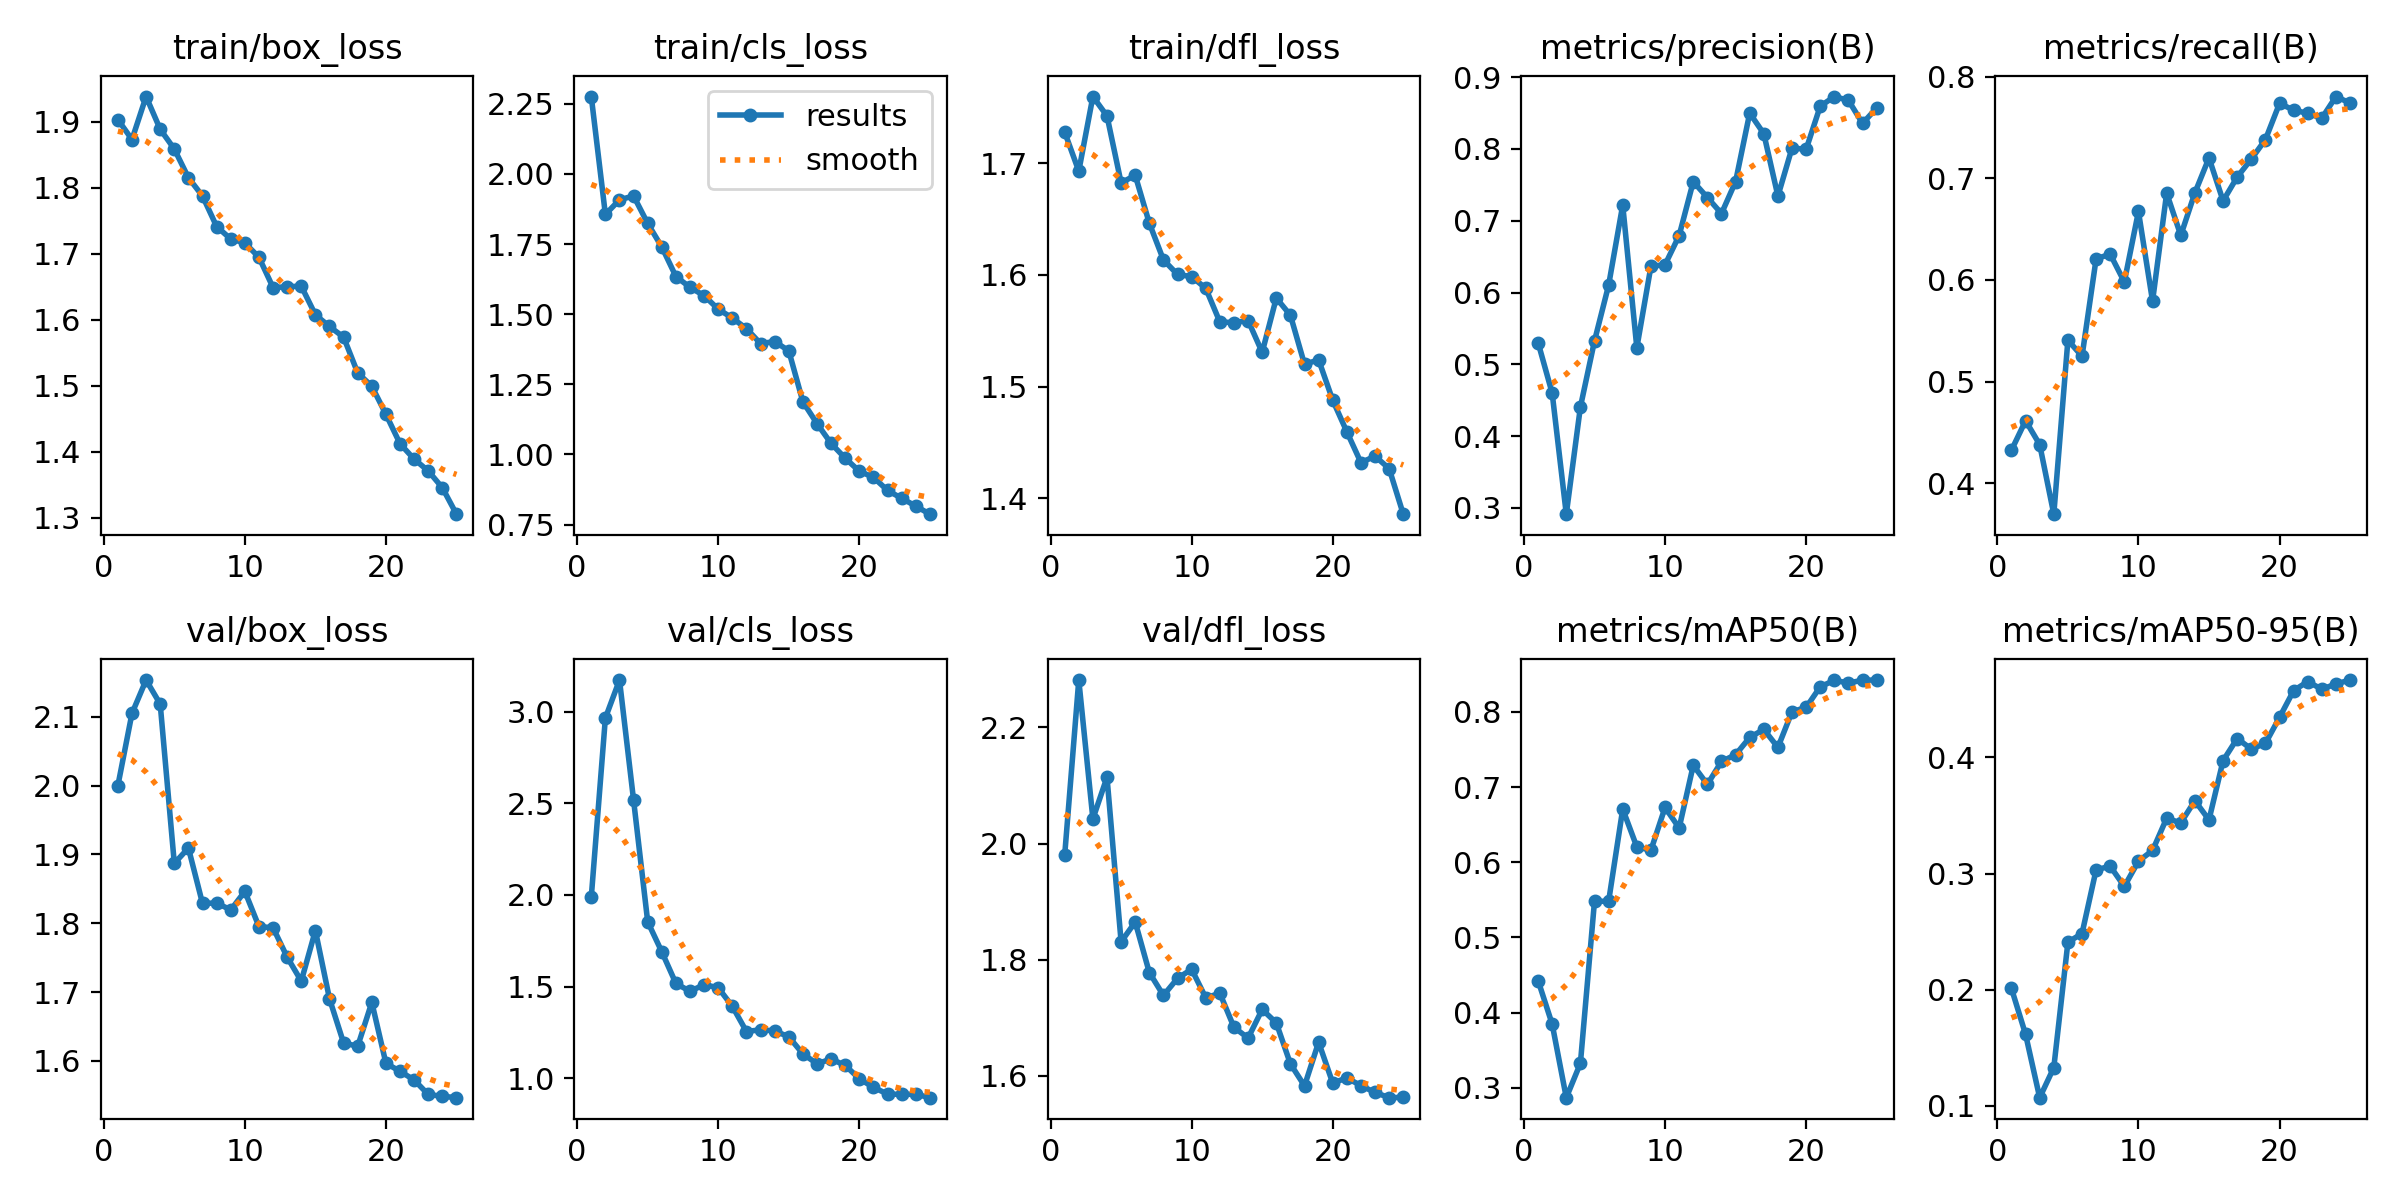

In [ ]:
Image(filename='/content/drive/MyDrive/data/runs/detect/train3/results.png', width=600)

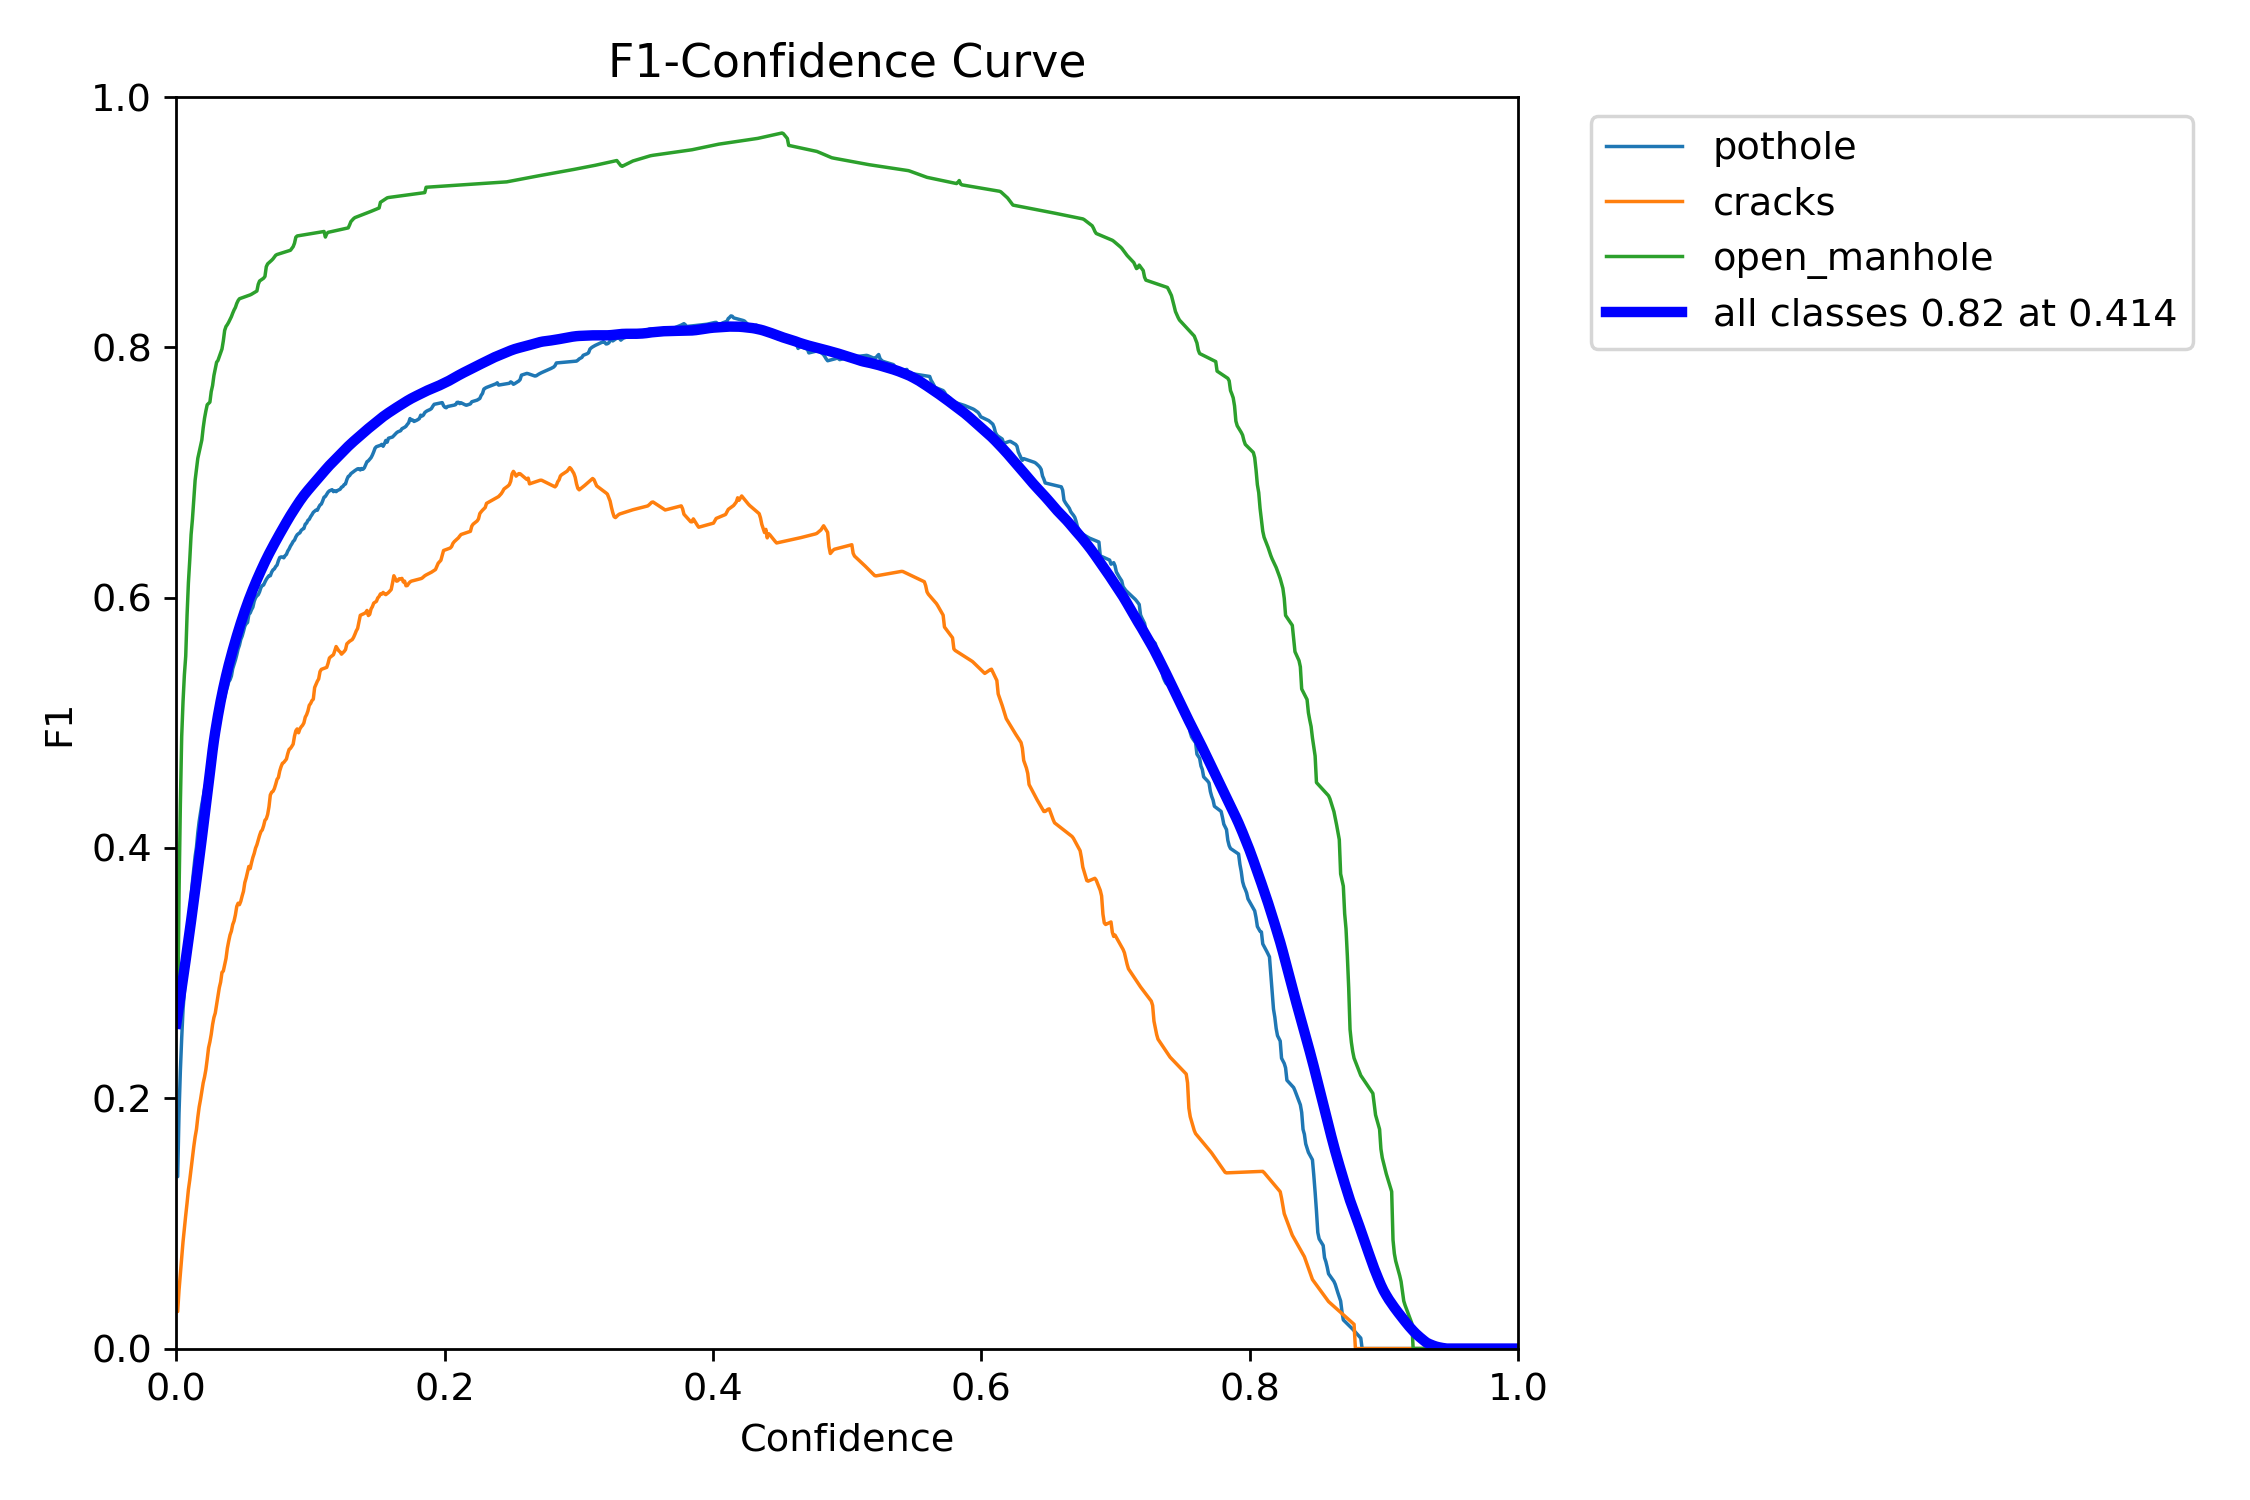

In [ ]:
Image(filename='/content/drive/MyDrive/data/runs/detect/train3/F1_curve.png', width=600)

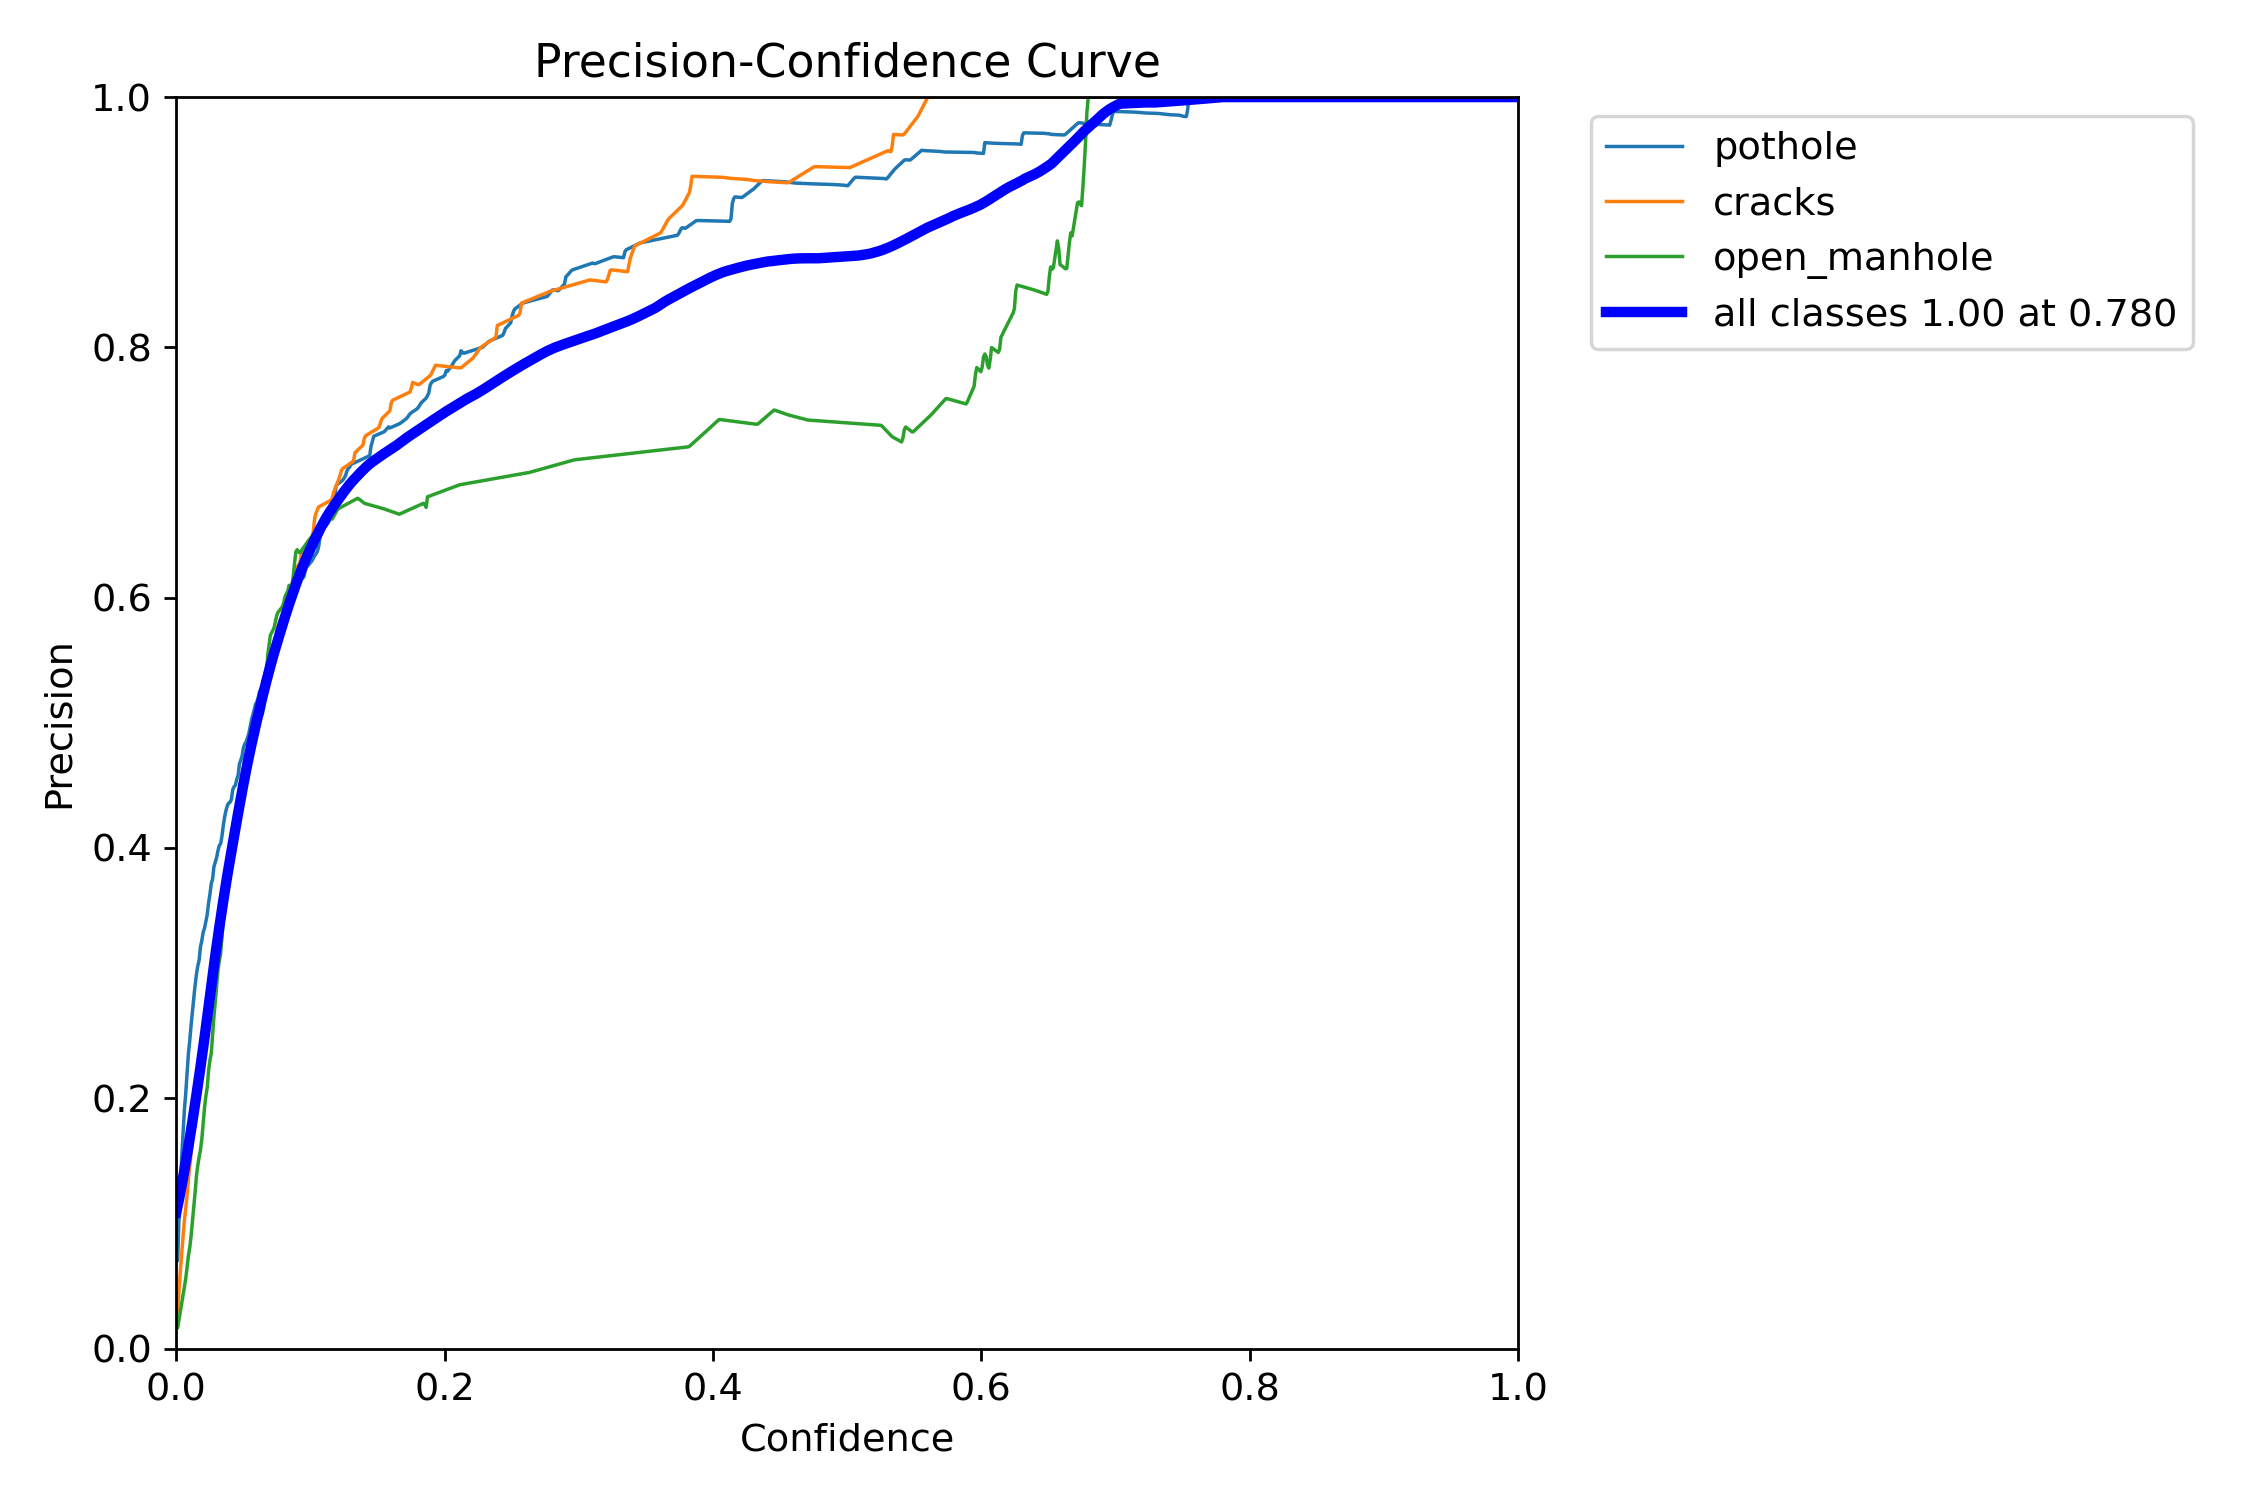

In [ ]:
Image(filename='/content/drive/MyDrive/data/runs/detect/train/P_curve.png', width=600)

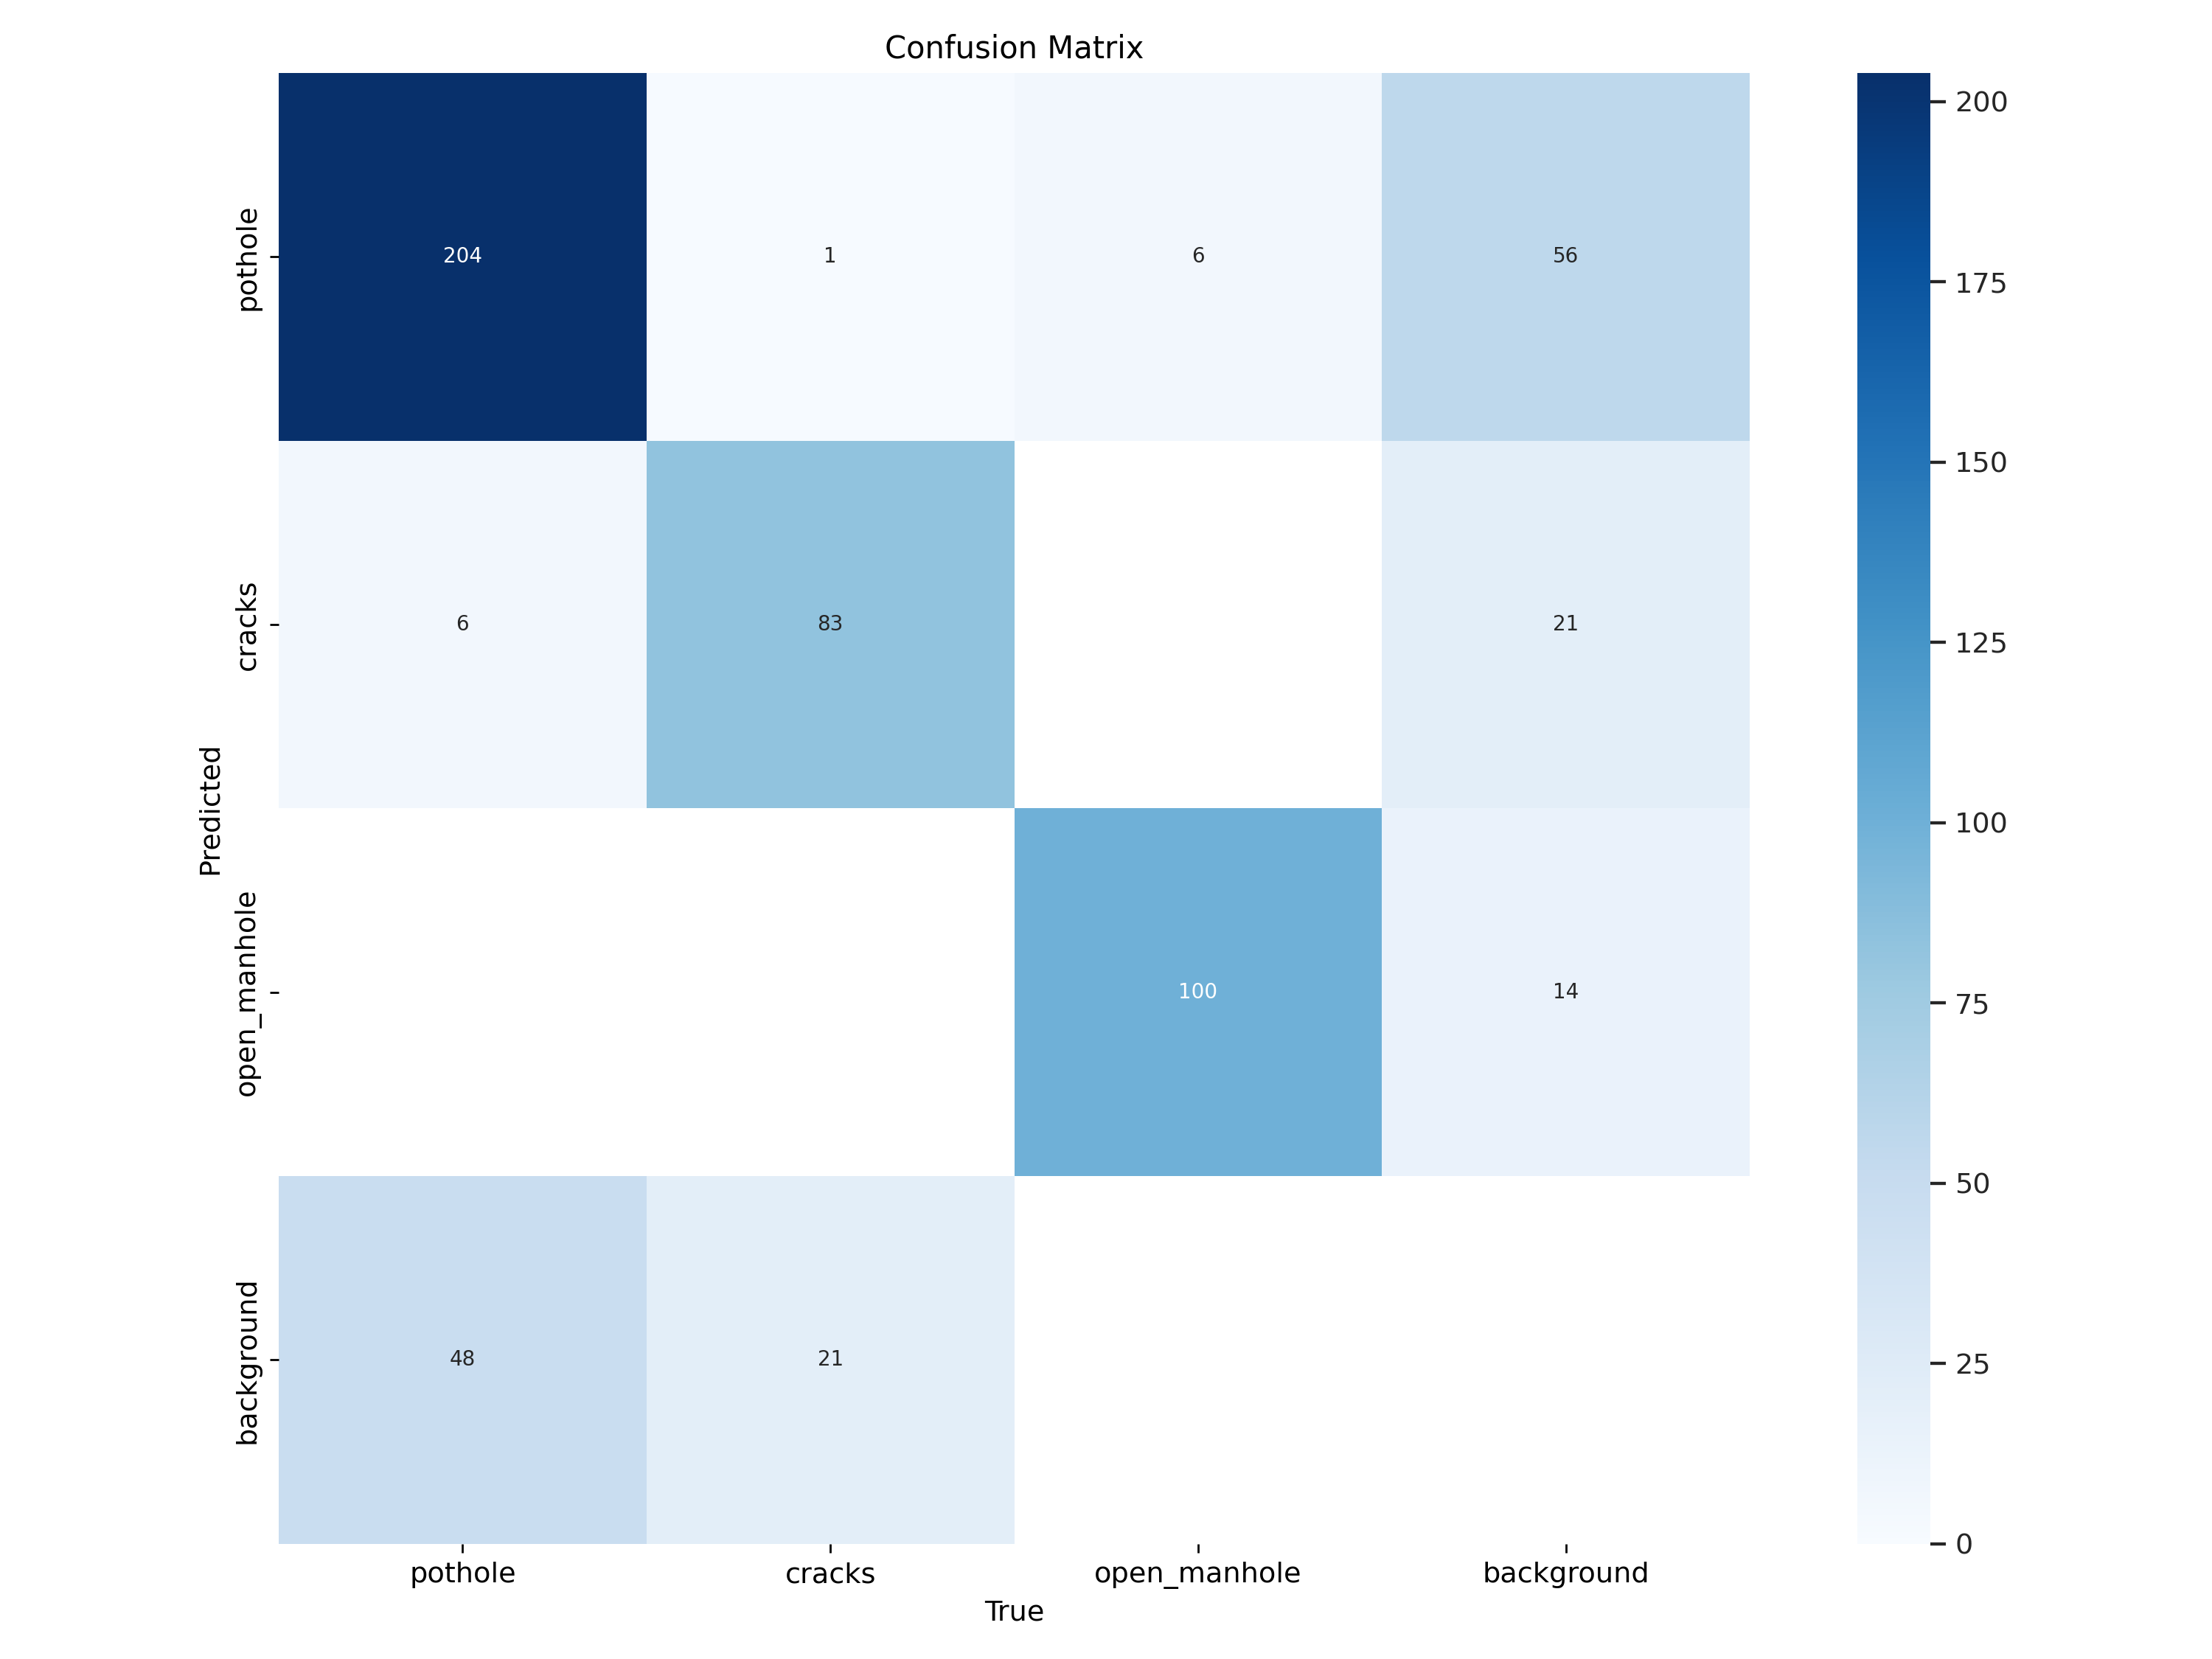

In [ ]:
Image(filename='/content/drive/MyDrive/data/runs/detect/train3/confusion_matrix.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/data/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/data/potholedataset/valid/labels.cache... 219 images, 0 backgrounds, 0 corrupt: 100% 219/219 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:03<00:00,  3.75it/s]
                   all        219        301      0.857      0.813      0.869      0.589
               pothole         88        148      0.907      0.862      0.918      0.579
                cracks         80         85      0.935      0.871      0.926      0.618
          open_manhole         66         68      0.729      0.706      0.764      0.569
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/data/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/data/potholedataset/test/images


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/11 /content/drive/MyDrive/data/potholedataset/test/images/360_F_916445076_KAGVDE2nuHOIxNARmepMJTgHQqd9Y7y0.jpg: 128x224 4 potholes, 38.2ms
image 2/11 /content/drive/MyDrive/data/potholedataset/test/images/DSC00004.jpg: 192x224 (no detections), 81.7ms
image 3/11 /content/drive/MyDrive/data/potholedataset/test/images/cracking-1-(1).jpg: 192x224 1 cracks, 9.1ms
image 4/11 /content/drive/MyDrive/data/potholedataset/test/images/images (1).jpeg: 160x224 1 pothole, 2 crackss, 37.4ms
image 5/11 /content/drive/MyDrive/data/potholedataset/test/images/images (2).jpeg: 160x224 1 pothole, 7.7ms
image 6/11 /content/drive/MyDrive/data/potholedataset/test/images/images (3).jpeg: 160x224 1 cracks, 8.7ms
image 7/11 /content/drive/MyDrive/data/potholedataset/test/images/images (4).jpeg: 224x192 1 cracks, 36.9ms
image 8/11 /content/dr

Test data's

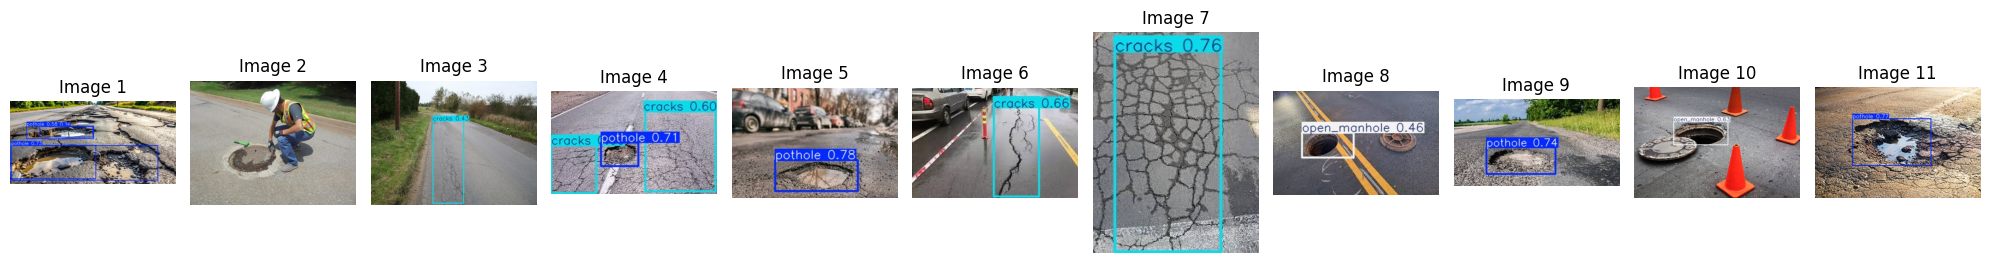

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder where YOLO saved the results
results_path = "runs/detect/predict"

# Get the list of predicted images
predicted_images = sorted(
    [os.path.join(results_path, img) for img in os.listdir(results_path) if img.endswith(('.jpg', '.png'))]
)

# Set up the plot (1 row and as many columns as needed)
fig, axes = plt.subplots(1, len(predicted_images), figsize=(20, 5))

# Loop through the images and display them
for i, image_path in enumerate(predicted_images):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

    # Display the image in the row
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


**Result Show:**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from google.colab import files

# Upload the image from your local machine
uploaded = files.upload()  # This will prompt you to upload an image

# Get the uploaded image file path
image_path = list(uploaded.keys())[0]

# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/data/runs/detect/train/weights/best.pt')

# Perform prediction on the uploaded image
results = model(image_path)

# Extract the image with bounding boxes
img_with_boxes = results[0].plot()  # Plot the image with boxes around detected objects

# Display the image with bounding boxes using matplotlib
plt.imshow(img_with_boxes)
plt.axis('off')  # Turn off axis
plt.show()


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
import glob
from IPython.display import Image, display

# Define the path to the prediction results
predicted_images_path = 'runs/detect/predict'  # This is the default output folder

# List all images with .jpg and .jpeg extensions in the prediction folder
predicted_images = glob.glob(predicted_images_path + '/*.jpg') + glob.glob(predicted_images_path + '/*.jpeg')

# Display each detected image with a smaller size
for img_path in predicted_images:
    print(f"Detected image: {img_path}")
    display(Image(filename=img_path, width=300))  # Set width to 300px (adjust as needed)

In [ ]:
import os

# Define paths for your train and valid folders
train_path = '/content/drive/MyDrive/data/dataset/train/images'
valid_path = '/content/drive/MyDrive/data/dataset/valid/images'

# Count the number of files in each folder
train_files = len(os.listdir(train_path))
valid_files = len(os.listdir(valid_path))

# Calculate the total number of files
total_files = train_files + valid_files

# Calculate percentages
train_percentage = (train_files / total_files) * 100
valid_percentage = (valid_files / total_files) * 100

# Print results
print(f"Training Data: {train_files} images ({train_percentage:.2f}%)")
print(f"Validation Data: {valid_files} images ({valid_percentage:.2f}%)")


Training Data: 2046 images (83.65%)
Validation Data: 400 images (16.35%)


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/data/runs/detect/train9/weights/best.pt conf=0.25 source=/content/drive/MyDrive/data/dataset/test/images


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/11 /content/drive/MyDrive/data/dataset/test/images/360_F_916445076_KAGVDE2nuHOIxNARmepMJTgHQqd9Y7y0.jpg: 128x224 2 potholes, 182.0ms
image 2/11 /content/drive/MyDrive/data/dataset/test/images/DSC00004.jpg: 192x224 1 pothole, 158.5ms
image 3/11 /content/drive/MyDrive/data/dataset/test/images/cracking-1-(1).jpg: 192x224 1 cracks, 93.2ms
image 4/11 /content/drive/MyDrive/data/dataset/test/images/images (1).jpeg: 160x224 1 pothole, 92.3ms
image 5/11 /content/drive/MyDrive/data/dataset/test/images/images (2).jpeg: 160x224 1 pothole, 166.5ms
image 6/11 /content/drive/MyDrive/data/dataset/test/images/images (3).jpeg: 160x224 2 crackss, 92.9ms
image 7/11 /content/drive/MyDrive/data/dataset/test/images/images (4).jpeg: 224x192 1 cracks, 132.6ms
image 8/11 /content/drive/MyDrive/data/dataset/test/images/images (5).jpeg: 160x224

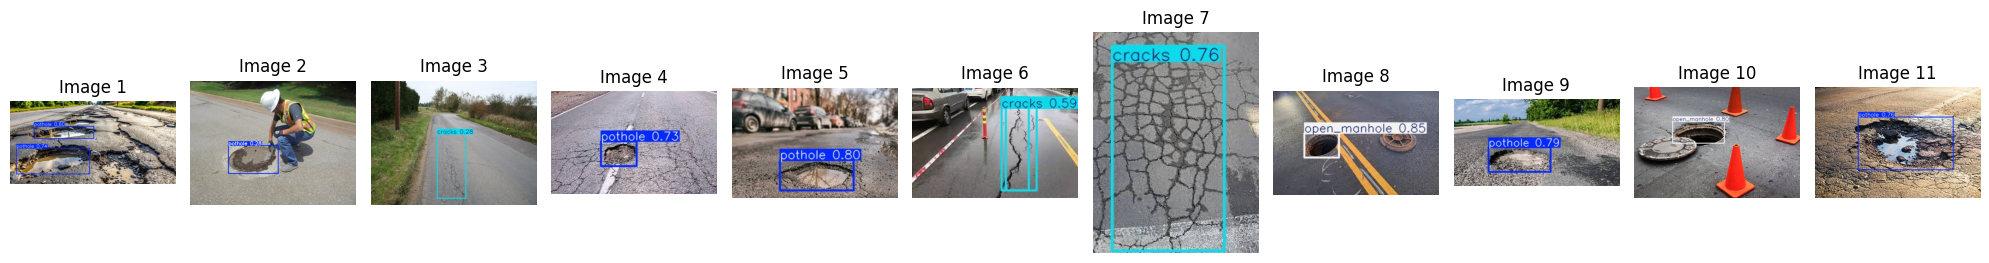

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder where YOLO saved the results
results_path = "runs/detect/predict"

# Get the list of predicted images
predicted_images = sorted(
    [os.path.join(results_path, img) for img in os.listdir(results_path) if img.endswith(('.jpg', '.png'))]
)

# Set up the plot (1 row and as many columns as needed)
fig, axes = plt.subplots(1, len(predicted_images), figsize=(20, 5))

# Loop through the images and display them
for i, image_path in enumerate(predicted_images):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

    # Display the image in the row
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
from IPython.display import Video  # For displaying the video in Colab

# Load your YOLO model
model = YOLO('/content/drive/MyDrive/data/runs/detect/train/weights/best.pt')

# Path to your input video
video_path = '/content/drive/MyDrive/data/dataset/test_video/testvideo1.mp4'  # Replace with your video file path
output_path = '/content/drive/MyDrive/data/predicted/train9_video1.mp4'

# Open video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define video writer to save the annotated video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)

    # Annotate the frame
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()

# Display the processed video in Colab
print(f"Processed video saved at: {output_path}")
Video(output_path, embed=True)


0: 128x224 3 potholes, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.2ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 5 potholes, 9.4ms
Speed: 0.9ms preprocess, 9.4ms inference, 1.2ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 5 potholes, 10.0ms
Speed: 1.1ms preprocess, 10.0ms inference, 1.2ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 3 potholes, 7.7ms
Speed: 0.8ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 2 potholes, 8.7ms
Speed: 1.1ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 2 potholes, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 2 potholes, 20.5ms
Speed: 0.7ms preprocess, 20.5ms inference, 1.7ms postprocess per image at shape (1, 3, 128, 224)

0: 128x224 2 potholes, 9.9ms
Speed: 0.7ms preprocess, 9.9ms inference, 1.2ms postprocess per image at shape (1, 3

In [ ]:
from ultralytics import YOLO
import cv2
from IPython.display import Video  # For displaying the video in Colab

# Load your YOLO model
model = YOLO('/content/drive/MyDrive/data/runs/detect/train20/weights/best.pt')

# Path to your input video
video_path = '/content/drive/MyDrive/data/dataset/test_video/testvideo1.mp4'  # Replace with your video file path
output_path = '/content/drive/MyDrive/data/predicted/train20_video1.mp4'

# Open video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define video writer to save the annotated video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)

    # Annotate the frame
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()

# Display the processed video in Colab
print(f"Processed video saved at: {output_path}")
Video(output_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder where YOLO saved the results
results_path = "runs/detect/predict7"

# Get the list of predicted images
predicted_images = sorted(
    [os.path.join(results_path, img) for img in os.listdir(results_path) if img.endswith(('.jpg', '.png'))]
)

# Set the number of rows and columns
rows, columns = 4, 5  # 4 rows and 5 columns for 20 images

# Adjust the figure size for better visibility
fig, axes = plt.subplots(rows, columns, figsize=(20, 15))

# Loop through the images and display them
for i, image_path in enumerate(predicted_images):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

    # Get the corresponding subplot
    ax = axes[i // columns, i % columns]
    ax.imshow(image)
    ax.axis('off')  # Hide axes
    ax.set_title(f"Image {i+1}")

# Hide any unused subplots
for i in range(len(predicted_images), rows * columns):
    axes[i // columns, i % columns].axis('off')

plt.tight_layout()
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-03bd21afa796>", line 10, in <cell line: 9>
    [os.path.join(results_path, img) for img in os.listdir(results_path) if img.endswith(('.jpg', '.png'))]
OSError: [Errno 107] Transport endpoint is not connected: 'runs/detect/predict7'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_g

In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm

# Paths for images and labels
images_path = '/content/drive/MyDrive/data/dataset/classes/cracks/images'
labels_path = '/content/drive/MyDrive/data/dataset/classes/cracks/labels/txt'
output_images_path = '/content/drive/MyDrive/data/dataset/classes/cracks/augmented/images'
output_labels_path = '/content/drive/MyDrive/data/dataset/classes/cracks/augmented/labels'

# Ensure output directories exist
os.makedirs(output_images_path, exist_ok=True)
os.makedirs(output_labels_path, exist_ok=True)  # Ensure the output labels directory exists

# Transformation pipeline without any augmentation (we'll apply them manually)
rotate_augment = A.Compose([A.Rotate(limit=30, border_mode=0, p=1.0)], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))
horizontal_flip_augment = A.Compose([A.HorizontalFlip(p=1.0)], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))
vertical_flip_augment = A.Compose([A.VerticalFlip(p=1.0)], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))
brightness_contrast_augment = A.Compose([A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=1.0)], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))

# Get list of all images and labels
image_files = sorted(os.listdir(images_path))
label_files = sorted(os.listdir(labels_path))

# Loop through existing images and augment
for image_file, label_file in tqdm(zip(image_files, label_files), total=len(image_files)):
    # Load image and corresponding label
    image_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, label_file)
    image = cv2.imread(image_path)

    # Load bounding boxes from YOLO label file
    with open(label_path, 'r') as f:
        lines = f.readlines()
    bboxes = []
    category_ids = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.split())
        bboxes.append([x_center, y_center, width, height])
        category_ids.append(int(class_id))  # Ensure class_id is an integer

    # Apply augmentations separately
    aug_image = image.copy()

    # Apply rotation
    augmented_rotate = rotate_augment(image=aug_image, bboxes=bboxes, category_ids=category_ids)
    base_name = os.path.splitext(image_file)[0]
    augmented_image_path = os.path.join(output_images_path, f'{base_name}_aug_rotate.jpg')
    cv2.imwrite(augmented_image_path, augmented_rotate['image'])

    # Save augmented label for rotated image
    augmented_label_path = os.path.join(output_labels_path, f'{base_name}_aug_rotate.txt')
    os.makedirs(os.path.dirname(augmented_label_path), exist_ok=True)  # Ensure directory exists
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented_rotate['bboxes'], augmented_rotate['category_ids']):
            f.write(f"{int(category_id)} {' '.join(map(str, bbox))}\n")  # Ensure class_id is saved as an integer

    # Apply horizontal flip
    augmented_flip = horizontal_flip_augment(image=aug_image, bboxes=bboxes, category_ids=category_ids)
    augmented_image_path = os.path.join(output_images_path, f'{base_name}_aug_flip.jpg')
    cv2.imwrite(augmented_image_path, augmented_flip['image'])

    # Save augmented label for horizontal flip
    augmented_label_path = os.path.join(output_labels_path, f'{base_name}_aug_flip.txt')
    os.makedirs(os.path.dirname(augmented_label_path), exist_ok=True)  # Ensure directory exists
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented_flip['bboxes'], augmented_flip['category_ids']):
            f.write(f"{int(category_id)} {' '.join(map(str, bbox))}\n")  # Ensure class_id is saved as an integer

    # Apply vertical flip
    augmented_vertical_flip = vertical_flip_augment(image=aug_image, bboxes=bboxes, category_ids=category_ids)
    augmented_image_path = os.path.join(output_images_path, f'{base_name}_aug_vertical_flip.jpg')
    cv2.imwrite(augmented_image_path, augmented_vertical_flip['image'])

    # Save augmented label for vertical flip
    augmented_label_path = os.path.join(output_labels_path, f'{base_name}_aug_vertical_flip.txt')
    os.makedirs(os.path.dirname(augmented_label_path), exist_ok=True)  # Ensure directory exists
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented_vertical_flip['bboxes'], augmented_vertical_flip['category_ids']):
            f.write(f"{int(category_id)} {' '.join(map(str, bbox))}\n")  # Ensure class_id is saved as an integer

    # Apply brightness and contrast
    augmented_brightness = brightness_contrast_augment(image=aug_image, bboxes=bboxes, category_ids=category_ids)
    augmented_image_path = os.path.join(output_images_path, f'{base_name}_aug_brightness_contrast.jpg')
    cv2.imwrite(augmented_image_path, augmented_brightness['image'])

    # Save augmented label for brightness and contrast
    augmented_label_path = os.path.join(output_labels_path, f'{base_name}_aug_brightness_contrast.txt')
    os.makedirs(os.path.dirname(augmented_label_path), exist_ok=True)  # Ensure directory exists
    with open(augmented_label_path, 'w') as f:
        for bbox, category_id in zip(augmented_brightness['bboxes'], augmented_brightness['category_ids']):
            f.write(f"{int(category_id)} {' '.join(map(str, bbox))}\n")  # Ensure class_id is saved as an integer

print(f"Augmentation completed!")


100%|██████████| 166/166 [00:23<00:00,  6.95it/s]

Augmentation completed!


first augmentaion

In [ ]:
import os

# Define directories for images and labels
image_dir = '/content/drive/MyDrive/data/dataset/train/images'
txt_dir = '/content/drive/MyDrive/data/dataset/train/labels'

# Count number of image files and label files
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
label_files = [f for f in os.listdir(txt_dir) if os.path.isfile(os.path.join(txt_dir, f))]

# Print the counts
print(f"Number of image files: {len(image_files)}")
print(f"Number of label files: {len(label_files)}")


Number of image files: 2038
Number of label files: 2038


In [ ]:
!nvcc --version

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8s.pt')  # Pre-trained YOLOv8 small model

# Train the model with increased image size
model.train(
    data="C:/Users/Ahsan/Downloads/data/data.yaml",  # Path to data.yaml
    epochs=25,
    imgsz=640,  # Increased image size
    plots=True
)


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/data/runs/detect/train20/weights/best.pt conf=0.25 source=/content/drive/MyDrive/data/dataset/test/images


Ultralytics 8.3.47 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (AMD EPYC 7B12)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/20 /content/drive/MyDrive/data/dataset/test/images/1000_F_256252609_6WIHRGbpzSaVQwioubxwgXdSJTNONNcK.jpg: 128x224 1 cracks, 53.6ms
image 2/20 /content/drive/MyDrive/data/dataset/test/images/360_F_916445076_KAGVDE2nuHOIxNARmepMJTgHQqd9Y7y0.jpg: 128x224 4 potholes, 40.1ms
image 3/20 /content/drive/MyDrive/data/dataset/test/images/81amBktM24L._AC_UF350,350_QL80_.jpg: 224x224 1 open_manhole, 65.0ms
image 4/20 /content/drive/MyDrive/data/dataset/test/images/DSC00004.jpg: 192x224 (no detections), 58.0ms
image 5/20 /content/drive/MyDrive/data/dataset/test/images/cracking-(1).jpg: 192x224 (no detections), 53.5ms
image 6/20 /content/drive/MyDrive/data/dataset/test/images/cracking-1-(1).jpg: 192x224 1 cracks, 53.3ms
image 7/20 /content/drive/MyDrive/data/dataset/test/images/depositphotos_53437389-stock-photo-road.jpg: 160x224 (no de

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder where YOLO saved the results
results_path = "runs/detect/predict8"

# Get the list of predicted images
predicted_images = sorted(
    [os.path.join(results_path, img) for img in os.listdir(results_path) if img.endswith(('.jpg', '.png'))]
)

# Set the number of rows and columns
rows, columns = 4, 5  # 4 rows and 5 columns for 20 images

# Adjust the figure size for better visibility
fig, axes = plt.subplots(rows, columns, figsize=(20, 15))

# Loop through the images and display them
for i, image_path in enumerate(predicted_images):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

    # Get the corresponding subplot
    ax = axes[i // columns, i % columns]
    ax.imshow(image)
    ax.axis('off')  # Hide axes
    ax.set_title(f"Image {i+1}")

# Hide any unused subplots
for i in range(len(predicted_images), rows * columns):
    axes[i // columns, i % columns].axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pip install -U ultralytics

In [ ]:
import os
import json
import cv2
import numpy as np

# Class names from your data.yaml
class_names = ["pothole", "cracks", "open_manhole"]

# Function to convert YOLO annotations to COCO format
def convert_yolo_to_coco(image_dir, label_dir, output_json):
    coco_images = []
    coco_annotations = []
    coco_categories = [{"id": i+1, "name": class_names[i]} for i in range(len(class_names))]
    annotation_id = 1  # Start annotation ID from 1

    # Process each image in the directory
    for image_filename in os.listdir(image_dir):
        if image_filename.endswith(".jpg"):  # Process only jpg images
            image_path = os.path.join(image_dir, image_filename)
            label_path = os.path.join(label_dir, os.path.splitext(image_filename)[0] + ".txt")

            if not os.path.exists(label_path):  # Skip if no label file exists for the image
                continue

            # Get image info for COCO format
            image = cv2.imread(image_path)
            height, width, _ = image.shape
            image_id = len(coco_images) + 1

            coco_images.append({
                "id": image_id,
                "file_name": image_filename,
                "width": width,
                "height": height
            })

            # Process each line in the label file
            with open(label_path, "r") as label_file:
                for line in label_file:
                    # Parse YOLO annotation
                    class_id, x_center, y_center, w, h = map(float, line.strip().split())

                    # Convert from normalized to pixel coordinates
                    x_min = (x_center - w / 2) * width
                    y_min = (y_center - h / 2) * height
                    x_max = (x_center + w / 2) * width
                    y_max = (y_center + h / 2) * height

                    # Create COCO annotation (add 1 to class_id for COCO format)
                    coco_annotation = {
                        "segmentation": [],  # Add segmentation data if available
                        "area": (x_max - x_min) * (y_max - y_min),  # Area of the bounding box
                        "iscrowd": 0,
                        "image_id": image_id,
                        "bbox": [x_min, y_min, x_max - x_min, y_max - y_min],
                        "category_id": int(class_id) + 1,  # COCO category ID starts at 1
                        "id": annotation_id
                    }
                    coco_annotations.append(coco_annotation)
                    annotation_id += 1

    # Create final COCO dataset
    coco_data = {
        "images": coco_images,
        "annotations": coco_annotations,
        "categories": coco_categories
    }

    # Save to JSON file
    with open(output_json, "w") as output_file:
        json.dump(coco_data, output_file, indent=4)

# Directories for images and labels
image_dir = '/content/drive/MyDrive/data/dataset/valid/images'
label_dir = '/content/drive/MyDrive/data/dataset/valid/labels'

# Output JSON file for COCO annotations
output_json = '/content/drive/MyDrive/data/valid_annotations.json'

# Convert YOLO to COCO
convert_yolo_to_coco(image_dir, label_dir, output_json)


In [72]:
import json
import matplotlib.pyplot as plt
import cv2
import random
from pycocotools.coco import COCO

# Path to your COCO annotations JSON file
coco_annotation_file = 'F:/data/valid_annotations1.json'


# Initialize COCO API
coco = COCO(coco_annotation_file)

# Check the categories (class names)
categories = coco.loadCats(coco.getCatIds())
category_names = [category['name'] for category in categories]
print(f"Categories: {category_names}")

# Define fixed colors for each category
category_colors = {
    "pothole": (255, 0, 0),        # Red for potholes
    "cracks": (0, 255, 0),         # Green for cracks
    "open_manhole": (0, 0, 255)    # Blue for open manholes
}

# Load image IDs
image_ids = coco.getImgIds()  # Get all image IDs
num_images_to_show = 30  # Number of random images to display

# Shuffle the list of image IDs to display random images
random.shuffle(image_ids)
images_to_display = image_ids[:num_images_to_show]  # Select the first 30 random images

# Set up the matplotlib figure to show multiple images
plt.figure(figsize=(15, 10))

for i, image_id in enumerate(images_to_display):
    # Load the image
    image_info = coco.loadImgs(image_id)[0]
    image_path = 'F:/data/dataset/valid/images/' + image_info['file_name']
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the annotations for this image
    annotation_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(annotation_ids)

    # Draw the bounding boxes on the image
    for ann in annotations:
        bbox = ann['bbox']  # The bounding box: [x, y, width, height]
        category_id = ann['category_id']

        # Adjust for YOLO category indexing (starts from 0 in YOLO, but starts from 1 in COCO)
        if category_id > 0:
            category_name = category_names[category_id - 1]
        else:
            category_name = category_names[category_id]  # Since YOLO starts from 0

        # Get the fixed color for this category
        color = category_colors[category_name]

        # Draw bounding box and label with the assigned color
        x, y, w, h = bbox
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), color, 2)
        cv2.putText(image, category_name, (int(x), int(y)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the image with its bounding boxes
    plt.subplot(6, 5, i + 1)  # 6 rows, 5 columns of images
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Image {i+1}")

# Show the plot with random images
plt.tight_layout()
plt.show()


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Categories: ['pothole', 'cracks', 'open_manhole']


<Figure size 1500x1000 with 30 Axes>

In [7]:
!pip install torch torchvision pycocotools tqdm

In [8]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from pycocotools.coco import COCO
import os
from PIL import Image
from tqdm import tqdm

class COCODataset(torch.utils.data.Dataset):
    def __init__(self, annotation_file, image_dir, transforms=None):
        self.coco = COCO(annotation_file)
        self.image_dir = image_dir
        self.transforms = transforms
        self.image_ids = list(self.coco.imgs.keys())

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        annotations = self.coco.loadAnns(self.coco.getAnnIds(imgIds=image_id))
        image_info = self.coco.loadImgs(image_id)[0]

        # Load image
        image_path = os.path.join(self.image_dir, image_info["file_name"])
        image = Image.open(image_path).convert("RGB")

        # Process annotations
        boxes = []
        labels = []
        for ann in annotations:
            x, y, width, height = ann["bbox"]
            if width > 0 and height > 0:  # Only add valid boxes
                boxes.append([x, y, x + width, y + height])
                labels.append(ann["category_id"])

        # Convert to tensor
        if len(boxes) == 0:  # Handle no annotations
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([image_id])
        }

        if self.transforms:
            image = self.transforms(image)

        return image, target


In [ ]:
from torch.utils.data import DataLoader

# Create datasets for train and validation
train_annotation_file = '/content/drive/MyDrive/data/train_annotations.json'
val_annotation_file = '/content/drive/MyDrive/data/valid_annotations.json'
train_image_dir = '/content/drive/MyDrive/data/dataset/train/images'
val_image_dir = '/content/drive/MyDrive/data/dataset/valid/images'

train_dataset = CocoDataset(train_annotation_file, train_image_dir)
val_dataset = CocoDataset(val_annotation_file, val_image_dir)

# Create DataLoader for both train and validation datasets
train_data_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_data_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))


In [9]:
# Define paths
train_annotation_file = '/content/drive/MyDrive/data/train_annotations.json'
val_annotation_file = '/content/drive/MyDrive/data/valid_annotations.json'
train_image_dir = '/content/drive/MyDrive/data/dataset/train/images'
val_image_dir = '/content/drive/MyDrive/data/dataset/valid/images'

# Define transformations (Optional, can be expanded as needed)
def get_transform():
    return torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()
    ])

# Create datasets
train_dataset = COCODataset(train_annotation_file, train_image_dir, transforms=get_transform())
val_dataset = COCODataset(val_annotation_file, val_image_dir, transforms=get_transform())

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2, collate_fn=lambda x: tuple(zip(*x)))


loading annotations into memory...
Done (t=0.87s)
creating index...
index created!
loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


In [10]:
# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 4  # 3 classes (pothole, cracks, open_manhole) + 1 background
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:04<00:00, 39.4MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [11]:
import os
import json
from PIL import Image

def validate_data(image_dir, annotation_file):
    # Load annotations from the JSON file
    with open(annotation_file) as f:
        annotations = json.load(f)

    # Get image file names from the annotation data
    image_files = {image['file_name'] for image in annotations['images']}

    # Check if image files exist
    missing_images = []
    for image_file in image_files:
        if not os.path.exists(os.path.join(image_dir, image_file)):
            missing_images.append(image_file)

    if missing_images:
        print(f"Missing images: {missing_images}")
        return False

    # Check if all bounding boxes are valid
    invalid_bboxes = []
    for annotation in annotations['annotations']:
        x, y, w, h = annotation['bbox']
        if w <= 0 or h <= 0:
            invalid_bboxes.append(annotation['id'])

    if invalid_bboxes:
        print(f"Invalid bounding boxes for annotations: {invalid_bboxes}")
        return False

    print("Data validation successful!")
    return True

# Define paths for your data
train_image_dir = '/content/drive/MyDrive/data/dataset/train/images'
val_image_dir = '/content/drive/MyDrive/data/dataset/valid/images'
train_annotation_file = '/content/drive/MyDrive/data/train_annotations.json'
val_annotation_file = '/content/drive/MyDrive/data/valid_annotations.json'

# Validate train and validation data
if not validate_data(train_image_dir, train_annotation_file):
    print("Training data validation failed. Please check your images and annotations.")
elif not validate_data(val_image_dir, val_annotation_file):
    print("Validation data validation failed. Please check your images and annotations.")
else:
    print("Starting training...")
    # Proceed with training after successful data validation
    model.train()  # Make sure your model is in training mode


Data validation successful!
Data validation successful!
Starting training...


In [12]:
def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    epoch_loss = 0
    for images, targets in tqdm(data_loader, desc="Training"):
        images = [image.to(device) for image in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()

        # Forward pass
        loss_dict = model(images, targets)

        # Sum all losses in the loss_dict
        if isinstance(loss_dict, list):
            losses = sum(loss for loss in loss_dict)  # Don't use .item(), keep it as a tensor
        else:
            losses = sum(loss for loss in loss_dict.values())  # Same here

        losses.backward()  # Now losses is a tensor, so backward() can be called
        optimizer.step()  # Update the weights
        epoch_loss += losses.item()  # Add the loss to the epoch's loss (convert to float here for reporting)

    avg_epoch_loss = epoch_loss / len(data_loader)
    return avg_epoch_loss

def validate_one_epoch(model, data_loader, device):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():  # No gradients needed for validation
        for images, targets in data_loader:
            images = [image.to(device) for image in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Forward pass
            loss_dict = model(images, targets)

            # Sum all losses in the loss_dict
            if isinstance(loss_dict, list):
                losses = sum(loss for loss in loss_dict)  # Don't use .item(), keep it as a tensor
            else:
                losses = sum(loss for loss in loss_dict.values())  # Same here

            epoch_loss += losses.item()  # Add the loss to the epoch's loss (convert to float here for reporting)

    avg_loss = epoch_loss / len(data_loader)
    return avg_loss


In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    train_loss = train_one_epoch(model, optimizer, train_loader, device)
    val_loss = validate_one_epoch(model, val_loader, device)

    lr_scheduler.step()

    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Save model checkpoint
    torch.save(model.state_dict(), f"faster_rcnn_epoch_{epoch + 1}.pth")
    print(f"Model saved for epoch {epoch + 1}")

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/drive/MyDrive/data/data.yaml",  # path to dataset YAML
    epochs=25,  # number of training epochs
    imgsz=224,  # training image size
    device="cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

# Evaluate model performance on the validation set
metrics = model.val()

# Perform object detection on an image
results = model("/content/drive/MyDrive/data/dataset/test/images/images (1).jpeg")
results[0].show()

# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/data/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning /content/drive/MyDrive/data/dataset/train/labels.cache... 2038 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2038/2038 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/data/dataset/valid/labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

Plotting labels to runs/detect/train23/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/train23
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G        1.9      2.737      1.592         10        224: 100%|██████████| 128/128 [05:16<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:46<00:00,  8.16s/it]

                   all        400        599      0.456      0.474      0.382      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      1.837       1.81      1.552         13        224: 100%|██████████| 128/128 [04:18<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:21<00:00,  1.64s/it]

                   all        400        599      0.389      0.462      0.379      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.811      1.734      1.541         16        224: 100%|██████████| 128/128 [04:09<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:21<00:00,  1.62s/it]

                   all        400        599      0.467      0.451       0.39      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.791      1.676      1.542         12        224: 100%|██████████| 128/128 [04:18<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.53s/it]

                   all        400        599      0.458      0.406      0.365      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G       1.74      1.588      1.514         16        224: 100%|██████████| 128/128 [04:08<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.48s/it]

                   all        400        599      0.654      0.445      0.504      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.735      1.527      1.485         11        224: 100%|██████████| 128/128 [04:12<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:21<00:00,  1.65s/it]

                   all        400        599      0.513      0.537      0.521      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G       1.68       1.42      1.462          8        224: 100%|██████████| 128/128 [04:08<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.50s/it]

                   all        400        599      0.542      0.536      0.512      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      1.681      1.396      1.453         16        224: 100%|██████████| 128/128 [04:07<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.47s/it]

                   all        400        599      0.651      0.562       0.59      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.654      1.371      1.442         15        224: 100%|██████████| 128/128 [04:08<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:20<00:00,  1.57s/it]

                   all        400        599      0.641      0.573      0.582      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.626      1.311      1.434         16        224: 100%|██████████| 128/128 [04:07<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.52s/it]

                   all        400        599      0.686      0.599      0.633      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.606      1.269      1.426         14        224: 100%|██████████| 128/128 [04:04<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.52s/it]

                   all        400        599      0.672      0.581      0.612      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      1.593      1.259      1.406         15        224: 100%|██████████| 128/128 [04:04<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.49s/it]

                   all        400        599       0.72      0.592      0.591      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G      1.602      1.232      1.403         41        224:  74%|███████▍  | 95/128 [03:01<01:00,  1.85s/it]

In [18]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.pt")

# Train the model
train_results = model.train(
    data="F:/data/data.yaml",  # path to dataset YAML file
    epochs=25,  # number of training epochs
    imgsz=416,  # reduce image size from 224 to 416 or smaller
    device="cuda",  # device to run on, use "cuda" if you want to use GPU
)


# Evaluate model performance on the validation set
metrics = model.val()

# Perform object detection on an image (make sure the path is correct)
results = model("F:/data/dataset/test/images/images (1).jpeg")  # Adjust the path
results[0].show()  # Show the results

# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model


Ultralytics 8.3.49  Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=F:/data/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning F:\data\dataset\train\labels.cache... 2038 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2038/2038 [00:00<?, ?it/s]
val: Scanning F:\data\dataset\valid\labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train7
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      1.76G      1.801      2.117      1.666         15        416: 100%|██████████| 128/128 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.96it/s]

                   all        400        599      0.442      0.568      0.425      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      1.78G      1.795      1.706      1.675         12        416: 100%|██████████| 128/128 [00:14<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.17it/s]

                   all        400        599      0.622      0.473      0.492      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      1.83G      1.799      1.716        1.7         15        416: 100%|██████████| 128/128 [00:14<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.98it/s]

                   all        400        599      0.517      0.428      0.442      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      1.83G       1.77       1.59       1.65         18        416: 100%|██████████| 128/128 [00:14<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.20it/s]

                   all        400        599      0.693      0.457      0.527      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      1.83G      1.721      1.509      1.625         20        416: 100%|██████████| 128/128 [00:13<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.97it/s]

                   all        400        599      0.581      0.479       0.51      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      1.82G      1.694      1.454      1.581         15        416: 100%|██████████| 128/128 [00:14<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.07it/s]

                   all        400        599       0.51      0.559      0.547      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      1.82G      1.655      1.409      1.578         23        416: 100%|██████████| 128/128 [00:14<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.94it/s]

                   all        400        599      0.614      0.593      0.625      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      1.76G      1.639      1.332      1.562         22        416: 100%|██████████| 128/128 [00:14<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.10it/s]

                   all        400        599      0.721      0.626      0.683      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      1.78G      1.572      1.261      1.515         14        416: 100%|██████████| 128/128 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.39it/s]


                   all        400        599       0.72      0.626       0.66      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      1.82G      1.572      1.215      1.497         16        416: 100%|██████████| 128/128 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.87it/s]

                   all        400        599       0.76       0.65      0.703      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      1.83G      1.526      1.171      1.484         17        416: 100%|██████████| 128/128 [00:15<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.97it/s]

                   all        400        599      0.767      0.617      0.703      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      1.83G      1.511      1.149      1.479         19        416: 100%|██████████| 128/128 [00:14<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.96it/s]

                   all        400        599      0.698      0.635      0.684      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      1.82G      1.482      1.095      1.457         14        416: 100%|██████████| 128/128 [00:14<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all        400        599      0.727      0.675      0.712      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      1.76G      1.462      1.079      1.451         17        416: 100%|██████████| 128/128 [00:14<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.60it/s]

                   all        400        599      0.716      0.635      0.677      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      1.77G       1.45       1.05      1.433         12        416: 100%|██████████| 128/128 [00:13<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]

                   all        400        599      0.738      0.666      0.676      0.304


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      1.77G      1.471     0.9393      1.468          6        416: 100%|██████████| 128/128 [00:14<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        400        599      0.773      0.678      0.715      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      1.76G      1.454     0.8854      1.432          6        416: 100%|██████████| 128/128 [00:13<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]

                   all        400        599      0.774       0.71      0.744      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      1.82G      1.422     0.8237      1.427          8        416: 100%|██████████| 128/128 [00:14<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.39it/s]

                   all        400        599      0.788      0.714      0.733      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      1.77G      1.391     0.8028      1.413          6        416: 100%|██████████| 128/128 [00:13<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.52it/s]

                   all        400        599      0.765      0.674      0.703      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      1.82G      1.346     0.7633       1.39          8        416: 100%|██████████| 128/128 [00:13<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.11it/s]

                   all        400        599      0.824      0.745      0.773      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      1.82G      1.318     0.7244      1.367          8        416: 100%|██████████| 128/128 [00:13<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.35it/s]

                   all        400        599       0.83      0.729      0.755      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      1.76G      1.281     0.6903      1.338          8        416: 100%|██████████| 128/128 [00:14<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.06it/s]

                   all        400        599      0.785      0.724      0.728      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      1.82G      1.253     0.6651       1.32          7        416: 100%|██████████| 128/128 [00:14<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.09it/s]

                   all        400        599      0.822      0.732      0.753      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      1.82G      1.223     0.6402      1.299          5        416: 100%|██████████| 128/128 [00:14<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.99it/s]

                   all        400        599      0.849       0.75       0.78      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      1.82G      1.184     0.6057      1.289          6        416: 100%|██████████| 128/128 [00:13<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.06it/s]

                   all        400        599      0.819       0.75      0.769      0.352



25 epochs completed in 0.133 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 22.5MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics 8.3.49  Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.56it/s]


                   all        400        599      0.851       0.75       0.78      0.367
               pothole        102        282      0.901      0.507       0.65      0.284
                cracks        154        169      0.758      0.796      0.764      0.316
          open_manhole        148        148      0.895      0.946      0.927      0.502
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\train7
Ultralytics 8.3.49  Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning F:\data\dataset\valid\labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]


                   all        400        599      0.845      0.757      0.782      0.369
               pothole        102        282      0.889      0.514      0.651      0.284
                cracks        154        169      0.758      0.811      0.769      0.318
          open_manhole        148        148      0.888      0.946      0.927      0.503
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train72

image 1/1 F:\data\dataset\test\images\images (1).jpeg: 288x416 1 pothole, 1 cracks, 63.3ms
Speed: 1.0ms preprocess, 63.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 416)
Ultralytics 8.3.49  Python-3.10.16 torch-2.5.1 CPU (Intel Core(TM) i7-7700K 4.20GHz)

PyTorch: starting from 'runs\detect\train7\weights\best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 7, 3549) (21.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting

In [56]:
!yolo task=detect mode=predict model=C:/Users/Ahsan/runs/detect/train25/weights/best.pt conf=0.25 source=F:/data/dataset/test/images


Ultralytics 8.3.53 ðŸš€ Python-3.10.16 torch-2.5.1 CPU (Intel Core(TM) i7-7700K 4.20GHz)


In [51]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder where YOLO saved the results
results_path = "runs/detect/predict6"

# Get the list of predicted images
predicted_images = sorted(
    [os.path.join(results_path, img) for img in os.listdir(results_path) if img.endswith(('.jpg', '.png'))]
)

# Set up the plot (1 row and as many columns as needed)
fig, axes = plt.subplots(1, len(predicted_images), figsize=(20, 5))

# Loop through the images and display them
for i, image_path in enumerate(predicted_images):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

    # Display the image in the row
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


<Figure size 2000x500 with 11 Axes>

<Figure size 2000x500 with 19 Axes>

In [73]:
import torch
from pycocotools.coco import COCO
import os
from PIL import Image

# Define the Dataset class
class COCODataset(torch.utils.data.Dataset):
    def __init__(self, annotation_file, image_dir, transforms=None):
        self.coco = COCO(annotation_file)  # Load the COCO annotations
        self.image_dir = image_dir
        self.transforms = transforms  # Transformations to be applied to the image
        self.image_ids = list(self.coco.imgs.keys())  # Get all image IDs

    def __len__(self):
        return len(self.image_ids)  # Return the number of images in the dataset

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]  # Get the image ID at the index
        annotations = self.coco.loadAnns(self.coco.getAnnIds(imgIds=image_id))  # Load annotations for the image
        image_info = self.coco.loadImgs(image_id)[0]  # Get image info

        # Load the image
        image_path = os.path.join(self.image_dir, image_info["file_name"])
        image = Image.open(image_path).convert("RGB")

        # Process the annotations into bounding boxes and labels
        boxes = []
        labels = []
        for ann in annotations:
            x, y, width, height = ann["bbox"]
            if width > 0 and height > 0:  # Only add valid boxes (non-zero size)
                boxes.append([x, y, x + width, y + height])
                labels.append(ann["category_id"])

        # Convert to tensor
        if len(boxes) == 0:  # Handle images with no annotations
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([image_id])
        }

        # Apply transformations to the image, if any
        if self.transforms:
            image = self.transforms(image)

        return image, target


In [74]:
from torchvision import transforms

# Define the transformation function
def get_transform(train=True):
    transform_list = []
    if train:
        # Omit RandomHorizontalFlip since augmentation is already done in preprocessing
        pass
    transform_list.append(transforms.ToTensor())  # Converts image to Tensor
    transform_list.append(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))  # Normalize the image

    return transforms.Compose(transform_list)



In [75]:
from tqdm import tqdm

# Define the training function
def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    epoch_loss = 0
    for images, targets in tqdm(data_loader, desc="Training"):
        images = [image.to(device) for image in images]  # Move images to device (GPU)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]  # Move targets to device

        optimizer.zero_grad()

        # Forward pass
        loss_dict = model(images, targets)

        # Sum all losses in the loss_dict
        if isinstance(loss_dict, list):
            losses = sum(loss for loss in loss_dict)  # Don't use .item(), keep it as a tensor
        else:
            losses = sum(loss for loss in loss_dict.values())  # Same here

        losses.backward()  # Now losses is a tensor, so backward() can be called
        optimizer.step()  # Update the weights
        epoch_loss += losses.item()  # Add the loss to the epoch's loss (convert to float here for reporting)

    avg_epoch_loss = epoch_loss / len(data_loader)
    return avg_epoch_loss

# Define the validation function
import torch

def validate_one_epoch(model, data_loader, device):
    model.train()  # Temporarily enable training mode to compute validation loss

    total_loss = 0
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        with torch.no_grad():  # Disable gradient computation for efficiency
            loss_dict = model(images, targets)

            # Check if the model returned a valid loss dictionary
            if isinstance(loss_dict, dict):
                batch_loss = sum(loss.item() for loss in loss_dict.values())
            else:
                raise ValueError("Model did not return a loss dictionary during validation.")

            total_loss += batch_loss

    return total_loss / len(data_loader)


In [76]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from torch.utils.data import DataLoader
import torch
import os
import csv

# Create datasets for training and validation
train_images_path = "F:/data/dataset/train/images"
valid_images_path = "F:/data/dataset/valid/images"
train_annotations_path = "F:/data/train_annotations1.json"
valid_annotations_path = "F:/data/valid_annotations1.json"

train_dataset = COCODataset(train_annotations_path, train_images_path, transforms=get_transform(train=True))
val_dataset = COCODataset(valid_annotations_path, valid_images_path, transforms=get_transform(train=False))

# Create DataLoader for both train and validation datasets
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Initialize the model, optimizer, and learning rate scheduler
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Ensure the model directory exists
os.makedirs("F:/data/model_cnn/faster_r_cnn_1", exist_ok=True)

# Create a CSV file to store mAP values
with open("F:/data/model_cnn/faster_r_cnn_1/map_values.csv", "w", newline="") as csvfile:
    fieldnames = ["Epoch", "mAP"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    train_loss = train_one_epoch(model, optimizer, train_loader, device)
    val_loss = validate_one_epoch(model, val_loader, device)

    lr_scheduler.step()

    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Save model checkpoint
    save_path = f"F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_{epoch + 1}.pth"
    torch.save(model.state_dict(), save_path)
    print(f"Model saved for epoch {epoch + 1} at {save_path}")


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Epoch 1/10


Training: 100%|██████████| 1118/1118 [06:07<00:00,  3.04it/s]


Train Loss: 0.1674, Validation Loss: 0.1994
Model saved for epoch 1 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_1.pth
Epoch 2/10


Training: 100%|██████████| 1118/1118 [05:58<00:00,  3.12it/s]


Train Loss: 0.1307, Validation Loss: 0.1953
Model saved for epoch 2 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_2.pth
Epoch 3/10


Training: 100%|██████████| 1118/1118 [06:01<00:00,  3.10it/s]


Train Loss: 0.1181, Validation Loss: 0.2039
Model saved for epoch 3 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_3.pth
Epoch 4/10


Training: 100%|██████████| 1118/1118 [06:01<00:00,  3.10it/s]


Train Loss: 0.0957, Validation Loss: 0.2064
Model saved for epoch 4 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_4.pth
Epoch 5/10


Training: 100%|██████████| 1118/1118 [05:59<00:00,  3.11it/s]


Train Loss: 0.0894, Validation Loss: 0.2170
Model saved for epoch 5 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_5.pth
Epoch 6/10


Training: 100%|██████████| 1118/1118 [06:01<00:00,  3.09it/s]


Train Loss: 0.0857, Validation Loss: 0.2172
Model saved for epoch 6 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_6.pth
Epoch 7/10


Training: 100%|██████████| 1118/1118 [06:00<00:00,  3.10it/s]


Train Loss: 0.0801, Validation Loss: 0.2206
Model saved for epoch 7 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_7.pth
Epoch 8/10


Training: 100%|██████████| 1118/1118 [05:59<00:00,  3.11it/s]


Train Loss: 0.0797, Validation Loss: 0.2220
Model saved for epoch 8 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_8.pth
Epoch 9/10


Training: 100%|██████████| 1118/1118 [05:59<00:00,  3.11it/s]


Train Loss: 0.0791, Validation Loss: 0.2241
Model saved for epoch 9 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_9.pth
Epoch 10/10


Training: 100%|██████████| 1118/1118 [06:01<00:00,  3.10it/s]


Train Loss: 0.0786, Validation Loss: 0.2236
Model saved for epoch 10 at F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_10.pth


In [13]:
pip install torchmetrics

  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/926.4 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/926.4 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 926.4/926.4 kB 4.3 MB/s eta 0:00:00
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tqdm import tqdm

# Define the training function
def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    epoch_loss = 0
    for images, targets in tqdm(data_loader, desc="Training"):
        images = [image.to(device) for image in images]  # Move images to device (GPU)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]  # Move targets to device

        optimizer.zero_grad()

        # Forward pass
        loss_dict = model(images, targets)

        # Sum all losses in the loss_dict
        if isinstance(loss_dict, list):
            losses = sum(loss for loss in loss_dict)  # Don't use .item(), keep it as a tensor
        else:
            losses = sum(loss for loss in loss_dict.values())  # Same here

        losses.backward()  # Now losses is a tensor, so backward() can be called
        optimizer.step()  # Update the weights
        epoch_loss += losses.item()  # Add the loss to the epoch's loss (convert to float here for reporting)

    avg_epoch_loss = epoch_loss / len(data_loader)
    return avg_epoch_loss

# Define the validation function
import torch

def validate_one_epoch(model, data_loader, device):
    model.train()  # Temporarily enable training mode to compute validation loss

    total_loss = 0
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        with torch.no_grad():  # Disable gradient computation for efficiency
            loss_dict = model(images, targets)

            # Check if the model returned a valid loss dictionary
            if isinstance(loss_dict, dict):
                batch_loss = sum(loss.item() for loss in loss_dict.values())
            else:
                raise ValueError("Model did not return a loss dictionary during validation.")

            total_loss += batch_loss

    return total_loss / len(data_loader)



In [24]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torch.utils.data import DataLoader
import torch
import os
import csv
from tqdm import tqdm
from torchmetrics import AveragePrecision, ConfusionMatrix, F1Score
import numpy as np

# ... (Your COCODataset and get_transform definitions) ...

# Create datasets for training and validation
train_images_path = "F:/data/dataset/train/images"
valid_images_path = "F:/data/dataset/valid/images"
train_annotations_path = "F:/data/train_annotations.json"
valid_annotations_path = "F:/data/valid_annotations.json"

train_dataset = COCODataset(train_annotations_path, train_images_path, transforms=get_transform(train=True))
val_dataset = COCODataset(valid_annotations_path, valid_images_path, transforms=get_transform(train=False))

# Create DataLoader for both train and validation datasets
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Initialize the model, optimizer, and learning rate scheduler
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Ensure the model directory exists
os.makedirs("F:/data/model_cnn/faster_r_cnn_1/results", exist_ok=True)

# Create a CSV file to store results
with open("F:/data/model_cnn/faster_r_cnn_1/results/results.csv", "w", newline="") as csvfile:
    fieldnames = ["Epoch", "Train Loss", "Validation Loss", "mAP", "F1 Score"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    train_loss = train_one_epoch(model, optimizer, train_loader, device)
    val_loss, mAP, conf_matrix, f1_score = validate_one_epoch(model, val_loader, device)

    lr_scheduler.step()

    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, mAP: {mAP:.4f}, F1 Score: {f1_score:.4f}")

    # Save results to CSV
    writer.writerow({"Epoch": epoch + 1, "Train Loss": train_loss, "Validation Loss": val_loss, "mAP": mAP, "F1 Score": f1_score})

    # Save model checkpoint
    save_path = f"F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_{epoch + 1}.pth"
    torch.save(model.state_dict(), save_path)
    print(f"Model saved for epoch {epoch + 1} at {save_path}")

    # Save confusion matrix
    np.save(f"F:/data/model_cnn/faster_r_cnn_1/results/confusion_matrix_epoch_{epoch + 1}.npy", conf_matrix.cpu().numpy())

# Define the training function
def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    epoch_loss = 0
    for images, targets in tqdm(data_loader, desc="Training"):
        images = [image.to(device) for image in images]  # Move images to device (GPU)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]  # Move targets to device

        optimizer.zero_grad()

        # Forward pass
        loss_dict = model(images, targets)

        # Sum all losses in the loss_dict
        if isinstance(loss_dict, list):
            losses = sum(loss for loss in loss_dict)  # Don't use .item(), keep it as a tensor
        else:
            losses = sum(loss for loss in loss_dict.values())  # Same here

        losses.backward()  # Now losses is a tensor, so backward() can be called
        optimizer.step()  # Update the weights
        epoch_loss += losses.item()  # Add the loss to the epoch's loss (convert to float here for reporting)

    avg_epoch_loss = epoch_loss / len(data_loader)
    return avg_epoch_loss

# Define the validation function
def validate_one_epoch(model, data_loader, device):
    model.eval()
    total_loss = 0
    evaluator = AveragePrecision(iou_threshold=0.5)
    conf_mat = ConfusionMatrix(num_classes=len(your_class_labels))
    f1_score = F1Score(num_classes=len(your_class_labels), average='macro')  # Calculate macro-averaged F1-score

    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        with torch.no_grad():
            predictions = model(images)[0]  # Get predictions (assuming model output is a tuple)
            pred_labels = [torch.argmax(p['scores'], dim=0).item() for p in predictions]
            true_labels = [t['labels'].cpu().numpy() for t in targets]

            # Calculate loss (unchanged)
            if isinstance(loss_dict, dict):
                batch_loss = sum(loss.item() for loss in loss_dict.values())
            else:
                raise ValueError("Model did not return a loss dictionary during validation.")

            total_loss += batch_loss

            # Update evaluators
            evaluator.update(predictions, targets)
            conf_mat.update(torch.tensor(pred_labels), torch.tensor(true_labels))
            f1_score.update(torch.tensor(pred_labels), torch.tensor(true_labels))

    # Calculate and return metrics
    mAP = evaluator.compute()
    conf_matrix = conf_mat.compute()
    f1_score = f1_score.compute()
    return total_loss / len(data_loader), mAP, conf_matrix, f1_score

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Epoch 1/10


Training: 100%|██████████| 1019/1019 [04:38<00:00,  3.65it/s]


TypeError: cannot unpack non-iterable float object

In [13]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\Ahsan


In [29]:
import os
import torch
from PIL import Image
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Paths
test_images_path = "F:/data/dataset/test/images"
results_path = "F:/data/model_cnn/faster_r_cnn_1/results"
os.makedirs(results_path, exist_ok=True)

# Device setup
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load the trained model
model = fasterrcnn_resnet50_fpn(pretrained=False)  # Ensure pretrained=False since it's a custom-trained model
model.load_state_dict(torch.load('F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_10.pth'))  # Update with your trained model path
model.to(device)
model.eval()

# Threshold for filtering low-confidence predictions
threshold = 0.5

# Function to test and save results
def test_and_save_results(image_path, output_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

    # Run inference
    with torch.no_grad():
        prediction = model(image_tensor)

    # Extract predictions
    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()

    # Filter predictions by threshold
    filtered_boxes = boxes[scores >= threshold]
    filtered_labels = labels[scores >= threshold]
    filtered_scores = scores[scores >= threshold]

    # Plot the image with bounding boxes
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image)

    for box, label, score in zip(filtered_boxes, filtered_labels, filtered_scores):
        x_min, y_min, x_max, y_max = box
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                  linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min, f"{label} ({score:.2f})",
                bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')

    # Save the output
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# Test all images in the folder
for image_name in os.listdir(test_images_path):
    image_path = os.path.join(test_images_path, image_name)
    if os.path.isfile(image_path) and image_name.lower().endswith(('jpg', 'jpeg', 'png')):
        output_path = os.path.join(results_path, f"results_{image_name}")
        print(f"Processing: {image_name}")
        test_and_save_results(image_path, output_path)

print(f"All results saved in {results_path}")


F:\anaconda3\envs\newenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
F:\anaconda3\envs\newenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Ahsan\AppData\Local\Temp\ipykernel_18584\1161064888.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipp

Processing: 1000_F_256252609_6WIHRGbpzSaVQwioubxwgXdSJTNONNcK.jpg
Processing: 360_F_916445076_KAGVDE2nuHOIxNARmepMJTgHQqd9Y7y0.jpg
Processing: closemahole1.jpg
Processing: cracking-(1).jpg
Processing: cracking-1-(1).jpg
Processing: cracks3.jpeg
Processing: depositphotos_53437389-stock-photo-road.jpg
Processing: DSC00004.jpg
Processing: file-16089009.jpg
Processing: images (1).jpeg
Processing: images (2).jpeg
Processing: images (4).jpeg
Processing: images (5).jpeg
Processing: images.jpeg
Processing: images.jpg
Processing: istockphoto-507839452-612x612.jpg
Processing: istockphoto-533964313-612x612.jpg
Processing: istockphoto-538686713-612x612.jpg
Processing: manhole1.jpg
Processing: resultsDSC00004_predicted.jpg
Processing: road1.jpg
All results saved in F:/data/model_cnn/faster_r_cnn_1/results


F:\anaconda3\envs\newenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
F:\anaconda3\envs\newenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Ahsan\AppData\Local\Temp\ipykernel_20700\995008535.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flippe

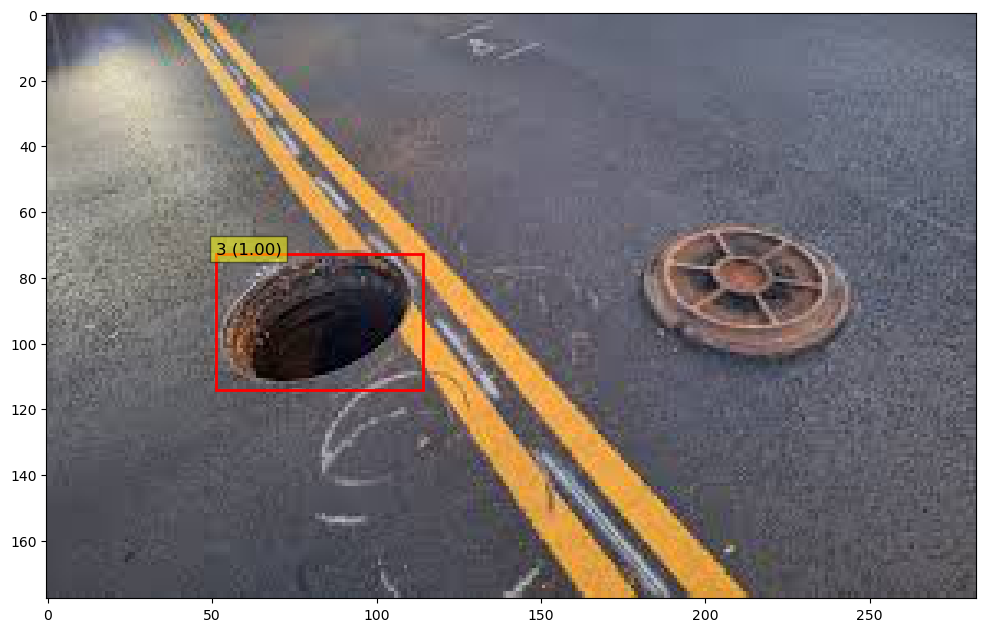

In [10]:
import torch
from PIL import Image
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Check and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained model
model = fasterrcnn_resnet50_fpn(pretrained=False)  # Custom-trained model, no pretrained weights
model.load_state_dict(torch.load('F:/data/model_cnn/faster_r_cnn/faster_rcnn_epoch_10.pth', map_location=device))
model.eval()  # Set model to evaluation mode
model.to(device)  # Move model to the device

# Load and preprocess the image
image_path = "F:/data/dataset/test/images/images (5).jpeg"
image = Image.open(image_path).convert("RGB")  # Open the image in RGB mode

# Convert the image to tensor
image_tensor = F.to_tensor(image).unsqueeze(0).to(device)  # Add batch dimension and move to the device

# Run inference
with torch.no_grad():  # Disable gradient computation
    prediction = model(image_tensor)

# Extract predictions
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
scores = prediction[0]['scores'].cpu().numpy()

# Set a confidence threshold
threshold = 0.5
filtered_boxes = boxes[scores >= threshold]
filtered_labels = labels[scores >= threshold]
filtered_scores = scores[scores >= threshold]

# Plot the image with bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Draw bounding boxes and labels
for box, label, score in zip(filtered_boxes, filtered_labels, filtered_scores):
    x_min, y_min, x_max, y_max = box  # Coordinates of the bounding box
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x_min, y_min, f"{label} ({score:.2f})", bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')

# Save and display the result
output_path = "F:/data/dataset/test/images/results/p_images (5).jpeg"
plt.savefig(output_path)
plt.show()


In [44]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8m.pt")

# Train the model
train_results = model.train(
    data=r"F:/data/data.yaml",  # Path to dataset YAML
    epochs=50,                  # Number of training epochs
    imgsz=640,                  # Training image size (default is 640 for YOLOv8)
    device="gpu"                # Device to run on (CPU or GPU)
)

# Evaluate model performance on the validation set
metrics = model.val()

# Perform object detection on an image
results = model(r"F:/data/dataset/test/images/images (1).jpeg")
results[0].show()  # Display the first result

# Export the model to ONNX format
path = model.export(format="onnx")  # Save the model in ONNX format


New https://pypi.org/project/ultralytics/8.3.55 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.53  Python-3.10.16 torch-2.5.1 CUDA:gpu (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=F:/data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning F:\data\dataset\train\labels... 2236 images, 106 backgrounds, 0 corrupt: 100%|██████████| 2236/2236 [00:08<00:00, 261.97it/s]

train: New cache created: F:\data\dataset\train\labels.cache



val: Scanning F:\data\dataset\valid\labels... 480 images, 0 backgrounds, 0 corrupt: 100%|██████████| 480/480 [00:00<00:00, 529.64it/s]


val: New cache created: F:\data\dataset\valid\labels.cache
Plotting labels to runs\detect\train25\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train25
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.68G      1.831      2.357      1.941         29        640: 100%|██████████| 140/140 [00:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]

                   all        480        743      0.113      0.153      0.068     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.89G      1.912      2.092      1.955         37        640: 100%|██████████| 140/140 [00:42<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]

                   all        480        743      0.395      0.269      0.241      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.98G      1.924      2.069      1.945         39        640: 100%|██████████| 140/140 [00:42<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]

                   all        480        743      0.683       0.26      0.361      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.88G      1.872      1.938      1.901         42        640: 100%|██████████| 140/140 [00:40<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.04it/s]

                   all        480        743      0.683      0.253      0.307      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.89G      1.817       1.82      1.856         33        640: 100%|██████████| 140/140 [00:40<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.42it/s]

                   all        480        743      0.527      0.479      0.519      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.89G      1.789      1.701      1.822         29        640: 100%|██████████| 140/140 [00:40<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]

                   all        480        743        0.5      0.471      0.498      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.88G      1.738      1.634      1.785         35        640: 100%|██████████| 140/140 [00:43<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.19it/s]

                   all        480        743      0.509      0.451      0.474      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.87G      1.727      1.573      1.753         35        640: 100%|██████████| 140/140 [00:42<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.13it/s]

                   all        480        743      0.636      0.544      0.598      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.88G      1.687        1.5      1.732         33        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]

                   all        480        743      0.568      0.524      0.542       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.87G      1.655      1.481      1.719         21        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        480        743      0.589      0.583      0.589      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.89G      1.655      1.448      1.696         31        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        480        743      0.653      0.662      0.702      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.87G      1.623       1.36      1.672         48        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:12<00:00,  1.19it/s]

                   all        480        743       0.64      0.616       0.66      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.87G      1.626      1.397      1.692         28        640: 100%|██████████| 140/140 [00:41<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.25it/s]

                   all        480        743       0.76      0.643      0.715      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.89G      1.597      1.322      1.644         41        640: 100%|██████████| 140/140 [00:40<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]

                   all        480        743      0.731      0.664      0.701      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.89G        1.6      1.269      1.643         30        640: 100%|██████████| 140/140 [00:40<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]

                   all        480        743      0.707      0.689      0.712      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.89G      1.565      1.248      1.625         27        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.25it/s]

                   all        480        743      0.787      0.635      0.707      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.87G      1.552      1.212      1.624         39        640: 100%|██████████| 140/140 [00:41<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]

                   all        480        743       0.72      0.666       0.71      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.89G       1.53      1.208      1.605         28        640: 100%|██████████| 140/140 [00:41<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]

                   all        480        743      0.756      0.673       0.73       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.89G      1.536      1.178      1.615         32        640: 100%|██████████| 140/140 [00:41<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]

                   all        480        743      0.727       0.67       0.71      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.88G      1.509      1.145      1.584         35        640: 100%|██████████| 140/140 [00:40<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]

                   all        480        743      0.645      0.636      0.664      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.87G      1.495       1.16      1.585         28        640: 100%|██████████| 140/140 [00:40<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all        480        743       0.74      0.674      0.708      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.88G      1.466      1.084      1.549         54        640: 100%|██████████| 140/140 [00:39<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        480        743      0.667      0.654      0.693      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.89G      1.469      1.097      1.551         29        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]

                   all        480        743      0.774       0.69      0.734      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.88G      1.425      1.007      1.526         40        640: 100%|██████████| 140/140 [00:40<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]

                   all        480        743      0.689      0.704      0.718      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.88G      1.424      1.025      1.517         35        640: 100%|██████████| 140/140 [00:40<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]

                   all        480        743      0.777      0.704      0.751      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.87G      1.413      1.033      1.514         34        640: 100%|██████████| 140/140 [00:40<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]

                   all        480        743      0.804      0.696      0.774       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.87G      1.406     0.9834      1.516         34        640: 100%|██████████| 140/140 [00:40<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.28it/s]

                   all        480        743       0.78      0.733       0.74      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.88G      1.383     0.9649      1.505         28        640: 100%|██████████| 140/140 [00:41<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:12<00:00,  1.22it/s]

                   all        480        743      0.758      0.694      0.714      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.89G       1.37     0.9421      1.485         27        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]

                   all        480        743      0.773      0.678      0.725      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.87G      1.357     0.9381       1.48         28        640: 100%|██████████| 140/140 [00:40<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]

                   all        480        743      0.743      0.691      0.714      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.89G      1.348     0.9143      1.473         29        640: 100%|██████████| 140/140 [00:39<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]

                   all        480        743      0.741      0.688      0.701      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.88G      1.327     0.9136      1.462         33        640: 100%|██████████| 140/140 [00:40<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]

                   all        480        743      0.809       0.66      0.738      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.87G      1.313     0.8732      1.436         33        640: 100%|██████████| 140/140 [00:41<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        480        743      0.805      0.688      0.743      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.89G      1.324     0.8634      1.452         18        640: 100%|██████████| 140/140 [00:41<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.27it/s]

                   all        480        743      0.771      0.691      0.727      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.88G      1.294     0.8515      1.418         29        640: 100%|██████████| 140/140 [00:40<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.27it/s]

                   all        480        743      0.766      0.723      0.741      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.89G       1.28      0.835       1.42         29        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]

                   all        480        743       0.78      0.687       0.74      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.88G      1.257     0.8239      1.402         42        640: 100%|██████████| 140/140 [00:42<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        480        743        0.8      0.692      0.738      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.88G      1.242     0.7887       1.39         32        640: 100%|██████████| 140/140 [00:42<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]

                   all        480        743      0.814      0.704      0.754      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.88G      1.234     0.7847      1.379         37        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]

                   all        480        743      0.783      0.723       0.75      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.88G      1.227     0.7878      1.386         23        640: 100%|██████████| 140/140 [00:40<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]

                   all        480        743      0.844      0.721      0.772      0.348


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.89G      1.213     0.6608      1.437         13        640: 100%|██████████| 140/140 [00:40<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]

                   all        480        743      0.803      0.722      0.747       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.88G      1.175     0.6115       1.41         16        640: 100%|██████████| 140/140 [00:40<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.30it/s]

                   all        480        743      0.733      0.715      0.698       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.88G      1.151     0.5945      1.401         17        640: 100%|██████████| 140/140 [00:39<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]

                   all        480        743      0.801       0.72      0.764      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.87G      1.126     0.5801      1.387         21        640: 100%|██████████| 140/140 [00:39<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]

                   all        480        743      0.809        0.7      0.744      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.88G      1.103     0.5572      1.357         14        640: 100%|██████████| 140/140 [00:38<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.33it/s]

                   all        480        743      0.818      0.723      0.766      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.89G      1.073     0.5496       1.34         12        640: 100%|██████████| 140/140 [00:38<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]

                   all        480        743      0.798      0.742      0.779       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.87G      1.061     0.5265       1.34         14        640: 100%|██████████| 140/140 [00:38<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]

                   all        480        743       0.82      0.722      0.769      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.88G       1.04     0.5186      1.316         14        640: 100%|██████████| 140/140 [00:39<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.62it/s]

                   all        480        743      0.808      0.728      0.769      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.87G      1.006     0.4943      1.293         23        640: 100%|██████████| 140/140 [00:39<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]

                   all        480        743      0.785       0.73       0.76      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.88G      1.003     0.4894      1.292         14        640: 100%|██████████| 140/140 [00:39<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.34it/s]

                   all        480        743      0.796      0.737      0.765      0.351



50 epochs completed in 0.717 hours.
Optimizer stripped from runs\detect\train25\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train25\weights\best.pt, 52.0MB

Validating runs\detect\train25\weights\best.pt...
Ultralytics 8.3.53  Python-3.10.16 torch-2.5.1 CUDA:gpu (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]


                   all        480        743      0.799      0.746      0.779      0.359
               pothole        182        425      0.779       0.58      0.672        0.3
                cracks        155        170      0.717      0.744       0.73      0.292
          open_manhole        148        148        0.9      0.912      0.935      0.486
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train25
Ultralytics 8.3.53  Python-3.10.16 torch-2.5.1 CUDA:gpu (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning F:\data\dataset\valid\labels.cache... 480 images, 0 backgrounds, 0 corrupt: 100%|██████████| 480/480 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.35it/s]


                   all        480        743      0.833      0.715      0.775      0.357
               pothole        182        425      0.831      0.546      0.669      0.295
                cracks        155        170      0.752      0.688       0.72      0.293
          open_manhole        148        148      0.915      0.912      0.935      0.483
Speed: 0.2ms preprocess, 6.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train252

image 1/1 F:\data\dataset\test\images\images (1).jpeg: 416x640 2 potholes, 1 cracks, 66.8ms
Speed: 2.0ms preprocess, 66.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Ultralytics 8.3.53  Python-3.10.16 torch-2.5.1 CPU (Intel Core(TM) i7-7700K 4.20GHz)

PyTorch: starting from 'runs\detect\train25\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (49.6 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.45...
ONNX: export s

In [53]:
!yolo task=detect mode=predict model=C:\Users\Ahsan\runs\detect\train25\weights\best.onnx conf=0.25 source=F:\data\dataset\test\images

Ultralytics 8.3.53 ðŸš€ Python-3.10.16 torch-2.5.1 CPU (Intel Core(TM) i7-7700K 4.20GHz)
Loading C:\Users\Ahsan\runs\detect\train25\weights\best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...


In [50]:
import torch
from torchvision import transforms
from PIL import Image
from models import YOLO  # Assuming your YOLO model is defined in 'models.py'

# Load the trained model
model = YOLO()  # Replace with your model's class
model.load_state_dict(torch.load('C:/Users/Ahsan/runs/detect/train25/weights/best.pt'))
model.eval()

# Define image transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Path to the test images directory
test_dir = 'data/dataset/test/images'

# Iterate through each image in the test directory
for image_path in os.listdir(test_dir):
    image = Image.open(os.path.join(test_dir, image_path))
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        detections = model(image_tensor)

    # Process detections (e.g., filter by confidence, draw bounding boxes)
    # ...

    # Optionally, save or display the results
    # ...

ModuleNotFoundError: No module named 'models'

In [91]:
from ultralytics import YOLO
import cv2
from IPython.display import Video  # For displaying the video in Colab

# Load your YOLO model
model = YOLO('F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_10.pth')

# Path to your input video
video_path = 'F:/data/dataset/test_video/testvideo1.mp4'  # Replace with your video file path
output_path = 'F:/data/dataset/test_video/results/testvideo_cnn1.mp4'

# Open video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define video writer to save the annotated video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)

    # Annotate the frame
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()

# Display the processed video in Colab
print(f"Processed video saved at: {output_path}")
Video(output_path, embed=True)

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


AssertionError: F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_10.pth acceptable suffix is ('.pt',), not .pth

In [100]:
import cv2
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
from IPython.display import Video  # For displaying the video in Colab

# Load your Faster R-CNN model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = fasterrcnn_resnet50_fpn(weights=None)  # No pre-trained weights
model.load_state_dict(torch.load('F:/data/model_cnn/faster_r_cnn_1/faster_rcnn_epoch_10.pth'))
model.to(device)
model.eval()

# Path to your input video
video_path = 'F:/data/dataset/test_video/testvideo7.mp4'  # Replace with your video file path
output_path = 'F:/data/dataset/test_video/results/testvideo_cnn7.mp4'

# Open video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define video writer to save the annotated video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame (NumPy array) to PIL image
    pil_image = Image.fromarray(frame)

    # Apply the same transformations as in training
    transform = get_transform(train=False)  # Use the same transform as validation
    pil_image = transform(pil_image).unsqueeze(0).to(device)  # Add batch dimension and send to device

    # Perform detection
    with torch.no_grad():
        prediction = model(pil_image)  # Get predictions (boxes, labels, scores)

    # Draw bounding boxes on the frame
    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()

    # Iterate over the detections and draw boxes
    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:  # Filter out weak detections
            x1, y1, x2, y2 = box
            frame = cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            label_text = f"Label: {label}, Score: {score:.2f}"
            frame = cv2.putText(frame, label_text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Write the annotated frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

# Display the processed video in Colab
print(f"Processed video saved at: {output_path}")
Video(output_path, embed=True)


Processed video saved at: F:/data/dataset/test_video/results/testvideo_cnn7.mp4


In [116]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
import cv2

# Load COCO annotations
def load_coco_annotations(annotation_file):
    with open(annotation_file, 'r') as f:
        data = json.load(f)
    return data

# COCO Data Generator
class CocoDataGenerator(Sequence):
    def __init__(self, image_dir, annotations, batch_size, target_size):
        self.image_dir = image_dir
        self.annotations = annotations['annotations']
        self.images = {img['id']: img for img in annotations['images']}
        self.categories = {cat['id']: cat for cat in annotations['categories']}
        self.batch_size = batch_size
        self.target_size = target_size
        self.num_samples = len(self.annotations)
        self.indices = list(range(self.num_samples))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(self.num_samples / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        labels = []
        for idx in batch_indices:
            ann = self.annotations[idx]
            img_info = self.images[ann['image_id']]
            img_path = os.path.join(self.image_dir, img_info['file_name'])
            if not os.path.exists(img_path):
                print(f"Image not found: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, self.target_size)
            img = img / 255.0

            # Generate one-hot label
            label = np.zeros(len(self.categories))
            label[ann['category_id'] - 1] = 1  # Category IDs in annotations start from 1
            images.append(img)
            labels.append(label)

        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

# Directories and parameters
train_annotations_file = "F:/data/train_annotations1.json"
valid_annotations_file = "F:/data/valid_annotations1.json"
train_image_dir = "F:/data/dataset/train/images"
valid_image_dir = "F:/data/dataset/valid/images"
target_size = (224, 224)
batch_size = 32
num_classes = 3

# Load annotations
train_annotations = load_coco_annotations(train_annotations_file)
valid_annotations = load_coco_annotations(valid_annotations_file)

# Create data generators
train_generator = CocoDataGenerator(train_image_dir, train_annotations, batch_size, target_size)
valid_generator = CocoDataGenerator(valid_image_dir, valid_annotations, batch_size, target_size)

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator)
)


F:\anaconda3\envs\newenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.7388 - loss: 0.6095 - val_accuracy: 0.8385 - val_loss: 0.4303
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.9253 - loss: 0.2214 - val_accuracy: 0.9421 - val_loss: 0.2280
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 308s 4s/step - accuracy: 0.9429 - loss: 0.1654 - val_accuracy: 0.9367 - val_loss: 0.2292
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 297s 4s/step - accuracy: 0.9465 - loss: 0.1445 - val_accuracy: 0.9300 - val_loss: 0.2142
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.9546 - loss: 0.1036 - val_accuracy: 0.9017 - val_loss: 0.2687
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.9664 - loss: 0.0909 - val_accuracy: 0.9327 - val_loss: 0.2071
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.9732 - loss: 0.0780 - val_accuracy: 0.9152 - val_loss: 0.2155
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.9668 - loss: 0.0870 - val_accuracy: 0.9354 - v

In [118]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2

# Load COCO annotations
def load_coco_annotations(annotation_file):
    with open(annotation_file, 'r') as f:
        data = json.load(f)
    return data

# COCO Data Generator
class CocoDataGenerator(Sequence):
    def __init__(self, image_dir, annotations, batch_size, target_size):
        self.image_dir = image_dir
        self.annotations = annotations['annotations']
        self.images = {img['id']: img for img in annotations['images']}
        self.categories = {cat['id']: cat for cat in annotations['categories']}
        self.batch_size = batch_size
        self.target_size = target_size
        self.num_samples = len(self.annotations)
        self.indices = list(range(self.num_samples))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(self.num_samples / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        labels = []
        for idx in batch_indices:
            ann = self.annotations[idx]
            img_info = self.images[ann['image_id']]
            img_path = os.path.join(self.image_dir, img_info['file_name'])
            if not os.path.exists(img_path):
                print(f"Image not found: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, self.target_size)
            img = img / 255.0

            # Generate one-hot label
            label = np.zeros(len(self.categories))
            label[ann['category_id'] - 1] = 1  # Category IDs in annotations start from 1
            images.append(img)
            labels.append(label)

        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

# Directories and parameters
train_annotations_file = "F:/data/train_annotations1.json"
valid_annotations_file = "F:/data/valid_annotations1.json"
train_image_dir = "F:/data/dataset/train/images"
valid_image_dir = "F:/data/dataset/valid/images"
target_size = (224, 224)
batch_size = 32
num_classes = 3

# Load annotations
train_annotations = load_coco_annotations(train_annotations_file)
valid_annotations = load_coco_annotations(valid_annotations_file)

# Create data generators
train_generator = CocoDataGenerator(train_image_dir, train_annotations, batch_size, target_size)
valid_generator = CocoDataGenerator(valid_image_dir, valid_annotations, batch_size, target_size)

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint('F:/data/vgg/best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with the checkpoint callback
model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    callbacks=[checkpoint]  # Add the checkpoint callback here
)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7095 - loss: 0.6505
Epoch 1: val_loss improved from inf to 0.34793, saving model to F:/data/vgg/best_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7108 - loss: 0.6480 - val_accuracy: 0.8735 - val_loss: 0.3479
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9259 - loss: 0.2163
Epoch 2: val_loss did not improve from 0.34793
83/83 ━━━━━━━━━━━━━━━━━━━━ 286s 3s/step - accuracy: 0.9259 - loss: 0.2162 - val_accuracy: 0.8910 - val_loss: 0.3489
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9381 - loss: 0.1714
Epoch 3: val_loss improved from 0.34793 to 0.25556, saving model to F:/data/vgg/best_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.9382 - loss: 0.1714 - val_accuracy: 0.9031 - val_loss: 0.2556
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9482 - loss: 0.1386
Epoch 4: val_loss improved from 0.25556 to 0.19918, saving model to F:/data/vgg/bes

In [ ]:
import cv2
import torch
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
from IPython.display import Video  # For displaying the video in Colab

# Load the VGG16 model
vgg_model_path = 'F:/data/vgg/best_model.keras'  # Path to your saved VGG model
model = load_model(vgg_model_path)

# Path to your input video
video_path = 'F:/data/dataset/test_video/testvideo7.mp4'  # Replace with your video file path
output_path = 'F:/data/dataset/test_video/results/testvideo_vgg7.mp4'

# Open video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define video writer to save the annotated video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Define the categories
categories = ['pothole', 'cracks', 'open_manhole']  # Assuming you have 3 categories

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame (NumPy array) to PIL image
    pil_image = Image.fromarray(frame)

    # Resize and preprocess the image for VGG16
    img = pil_image.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Perform prediction
    prediction = model.predict(img_array)

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = categories[predicted_class[0]]

    # Draw label on the frame
    label_text = f"Prediction: {predicted_label}, Score: {prediction[0][predicted_class[0]]:.2f}"
    frame = cv2.putText(frame, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Write the annotated frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

# Display the processed video in Colab
print(f"Processed video saved at: {output_path}")
Video(output_path, embed=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


In [11]:
!pip install efficientnet-pytorch


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16458 sha256=d469c3f357c517afcce1e34cbadd45aa334fb3e72cf1827ec180cbbd74699cec
  Stored in directory: c:\users\ahsan\appdata\local\pip\cache\wheels\03\3f\e9\911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [10]:
import json
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

class COCODataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        with open(annotations_file) as f:
            self.coco_data = json.load(f)
        self.img_dir = img_dir
        self.transform = transform
        self.image_id_to_filename = {img["id"]: img["file_name"] for img in self.coco_data["images"]}
        self.annotations = self.coco_data["annotations"]
        self.categories = {cat["id"]: cat["name"] for cat in self.coco_data["categories"]}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        annotation = self.annotations[idx]
        img_id = annotation["image_id"]
        category_id = annotation["category_id"]

        # Load the image
        img_path = f"{self.img_dir}/{self.image_id_to_filename[img_id]}"
        image = Image.open(img_path).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Return image and label (0-based index)
        return image, category_id - 1


In [11]:
# Paths to data
train_annotations_file = "F:/data/train_annotations1.json"
valid_annotations_file = "F:/data/valid_annotations1.json"
train_image_dir = "F:/data/dataset/train/images"
valid_image_dir = "F:/data/dataset/valid/images"

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Datasets
train_dataset = COCODataset(train_annotations_file, train_image_dir, transform=transform)
valid_dataset = COCODataset(valid_annotations_file, valid_image_dir, transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Valid dataset size: {len(valid_dataset)}")


Train dataset size: 2628
Valid dataset size: 743


In [12]:
import torch
from efficientnet_pytorch import EfficientNet

# Load EfficientNet model
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=3)  # Adjust num_classes to match your categories
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Optimizer and loss function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Loaded pretrained weights for efficientnet-b0


In [13]:
for epoch in range(25):  # Adjust epochs as needed
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")


Epoch 1, Loss: 0.2833070839670571
Epoch 2, Loss: 0.17836994471197778
Epoch 3, Loss: 0.15831034238534894
Epoch 4, Loss: 0.12388810674786907
Epoch 5, Loss: 0.0908221532661242
Epoch 6, Loss: 0.11358882184493158
Epoch 7, Loss: 0.0892308888734657
Epoch 8, Loss: 0.05872001941152672
Epoch 9, Loss: 0.07206375474166689
Epoch 10, Loss: 0.07073711290740352
Epoch 11, Loss: 0.06573667154306984
Epoch 12, Loss: 0.08884161406692301
Epoch 13, Loss: 0.08988631948278371
Epoch 14, Loss: 0.06387058004347085
Epoch 15, Loss: 0.048771147895582324
Epoch 16, Loss: 0.04562069489587554
Epoch 17, Loss: 0.0548418942419768
Epoch 18, Loss: 0.10747851805768512
Epoch 19, Loss: 0.15743284354155715
Epoch 20, Loss: 0.07618047731935583
Epoch 21, Loss: 0.05040481501540247
Epoch 22, Loss: 0.05451003572088666
Epoch 23, Loss: 0.09173822414531693
Epoch 24, Loss: 0.10797748731830242
Epoch 25, Loss: 0.048057015319390106


In [14]:
import torch
from efficientnet_pytorch import EfficientNet

# Load EfficientNet model
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=3)  # Adjust num_classes to match your categories
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Optimizer and loss function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Loaded pretrained weights for efficientnet-b0


In [15]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {correct / total:.2f}")


Validation Accuracy: 0.24


In [16]:
torch.save(model.state_dict(), "F:/data/EfficientNet/model.pth")


In [25]:
!pip install efficientnet-pytorch
!pip install pillow


In [26]:
import os
import json
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class CustomDataset(Dataset):
    def __init__(self, annotations_file, images_dir, transform=None):
        """
        Args:
            annotations_file (string): Path to the annotations file (COCO format).
            images_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        with open(annotations_file) as f:
            self.annotations = json.load(f)

        self.images_dir = images_dir
        self.transform = transform

        # Map category id to label (adjust if you have different categories)
        self.category_map = {
            1: "pothole",
            2: "cracks",
            3: "open_manhole"
        }

    def __len__(self):
        return len(self.annotations['images'])

    def __getitem__(self, idx):
        # Get the image information
        image_info = self.annotations['images'][idx]
        image_id = image_info['id']
        image_filename = image_info['file_name']
        image_path = os.path.join(self.images_dir, image_filename)

        # Open the image
        image = Image.open(image_path).convert("RGB")

        # Get the annotations for the image
        annotations = [anno for anno in self.annotations['annotations'] if anno['image_id'] == image_id]

        # Prepare the label (class id)
        labels = []
        for anno in annotations:
            category_id = anno['category_id']
            labels.append(category_id - 1)  # Convert to 0-indexed class

        # If you have multiple annotations, pick the first one (or handle it based on your logic)
        label = labels[0] if len(labels) > 0 else 0

        # Apply the transformation if provided
        if self.transform:
            image = self.transform(image)

        return image, label


In [27]:
from torch.utils.data import DataLoader
from torchvision import datasets

# Define data transformations for training and validation
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to match EfficientNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet mean and std
])

transform_valid = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define Dataset and DataLoader
train_dataset = CustomDataset(annotations_file='F:/data/train_annotations1.json',
                               images_dir='F:/data/dataset/train/images',
                               transform=transform_train)

valid_dataset = CustomDataset(annotations_file='F:/data/valid_annotations1.json',
                               images_dir='F:/data/dataset/valid/images',
                               transform=transform_valid)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


In [28]:
from efficientnet_pytorch import EfficientNet
import torch
import torch.nn as nn

# Load pre-trained EfficientNet model (EfficientNet-B0 in this case)
model = EfficientNet.from_pretrained('efficientnet-b0')

# Modify the classifier layer to match your number of classes
num_classes = 3  # You have 3 classes: pothole, cracks, open_manhole
model._fc = nn.Linear(model._fc.in_features, num_classes)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


Loaded pretrained weights for efficientnet-b0


In [29]:
import torch.optim as optim
from torch import nn

# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Define the loss function (CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()
    valid_correct = 0
    valid_total = 0
    with torch.no_grad():
        for images, targets in valid_loader:
            images, targets = images.to(device), targets.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            valid_total += targets.size(0)
            valid_correct += (predicted == targets).sum().item()

    valid_accuracy = 100 * valid_correct / valid_total
    print(f"Validation Accuracy: {valid_accuracy:.2f}%")


Epoch [1/10], Loss: 0.5930, Accuracy: 83.36%
Validation Accuracy: 94.38%
Epoch [2/10], Loss: 0.1570, Accuracy: 95.75%
Validation Accuracy: 96.67%
Epoch [3/10], Loss: 0.0672, Accuracy: 98.75%
Validation Accuracy: 97.71%
Epoch [4/10], Loss: 0.0466, Accuracy: 98.61%
Validation Accuracy: 98.75%
Epoch [5/10], Loss: 0.0271, Accuracy: 99.37%
Validation Accuracy: 98.75%
Epoch [6/10], Loss: 0.0188, Accuracy: 99.55%
Validation Accuracy: 98.54%
Epoch [7/10], Loss: 0.0168, Accuracy: 99.64%
Validation Accuracy: 98.96%
Epoch [8/10], Loss: 0.0152, Accuracy: 99.64%
Validation Accuracy: 98.96%
Epoch [9/10], Loss: 0.0087, Accuracy: 99.91%
Validation Accuracy: 98.75%
Epoch [10/10], Loss: 0.0104, Accuracy: 99.87%
Validation Accuracy: 98.33%


In [31]:
# Save the model
save_path = 'F:/data/EfficientNet/efficientnet_model.pth'
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")


Model saved to F:/data/EfficientNet/efficientnet_model.pth


In [32]:
import torch
from torchvision import transforms
from PIL import Image
import os
from efficientnet_pytorch import EfficientNet
import numpy as np


In [33]:
# Define the model (assuming you are using EfficientNet-B0, change if necessary)
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=3)

# Load the trained weights
model_path = 'F:/data/EfficientNet/efficientnet_model.pth'
model.load_state_dict(torch.load(model_path))
model.eval()  # Set the model to evaluation mode


Loaded pretrained weights for efficientnet-b0


C:\Users\Ahsan\AppData\Local\Temp\ipykernel_21384\1231065595.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [34]:
# Define the transformation for the input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to the size expected by EfficientNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization for EfficientNet
])


In [35]:
# Define class labels
class_names = ['pothole', 'cracks', 'open_manhole']  # Update based on your dataset

def classify_image(image_path):
    # Open the image
    img = Image.open(image_path).convert('RGB')

    # Apply the transformations
    img = transform(img).unsqueeze(0)  # Add batch dimension

    # Predict with the model
    with torch.no_grad():  # No need to calculate gradients during inference
        output = model(img)
        _, predicted_class = torch.max(output, 1)

    # Return the predicted class label
    return class_names[predicted_class.item()]


In [36]:
# Directory containing the test images
test_dir = 'F:/data/dataset/test/images'

# List all the images in the directory
test_images = [f for f in os.listdir(test_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Iterate over all test images and classify them
for image_name in test_images:
    image_path = os.path.join(test_dir, image_name)

    # Classify the image
    predicted_class = classify_image(image_path)

    # Print the result
    print(f"Image: {image_name} - Predicted Class: {predicted_class}")


Image: 1000_F_256252609_6WIHRGbpzSaVQwioubxwgXdSJTNONNcK.jpg - Predicted Class: cracks
Image: 360_F_916445076_KAGVDE2nuHOIxNARmepMJTgHQqd9Y7y0.jpg - Predicted Class: pothole
Image: closemahole1.jpg - Predicted Class: pothole
Image: cracking-(1).jpg - Predicted Class: cracks
Image: cracking-1-(1).jpg - Predicted Class: cracks
Image: depositphotos_53437389-stock-photo-road.jpg - Predicted Class: pothole
Image: DSC00004.jpg - Predicted Class: open_manhole
Image: file-16089009.jpg - Predicted Class: pothole
Image: images.jpg - Predicted Class: pothole
Image: istockphoto-507839452-612x612.jpg - Predicted Class: open_manhole
Image: istockphoto-533964313-612x612.jpg - Predicted Class: pothole
Image: istockphoto-538686713-612x612.jpg - Predicted Class: cracks
Image: manhole1.jpg - Predicted Class: open_manhole
Image: road1.jpg - Predicted Class: pothole
